# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from customer of a food delivery company.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will specify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

***Features:***
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- ***Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise*** 
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- The First Look

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering with numeric features

    * Create a new dataset with numeric features
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Clustering based on selected features

    * Create a new dataset with variables of your choice*
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering with selected features

    * Determine optimal number of clusters using Dendogram*

    * Apply Agglomerative Clustering*

    * Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

### Import Libraries

In [359]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.metrics import silhouette_score

from ipywidgets import interact
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format = (
    lambda x: "{:.0f}".format(x) if int(x) == x else "{:,.2f}".format(x)
)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


### Load Dataset

In [360]:
%matplotlib inline


In [361]:
# Load the dataset from CSV file
# Adjust the path if necessary
df_1 = pd.read_csv('marketing_campaign.csv', sep=';')



### The First Look
- Since we will do clustering analysis, we will remove Response variable from dataset.
- You can rename columns to more usable, if you need.

In [362]:
df_1.sample(10).T

836         2230        238         723   \
ID                         6141        7004        7297       10936   
Year_Birth                 1972        1984        1973        1965   
Education                Master  Graduation  Graduation  Graduation   
Marital_Status           Single      Single      Single     Married   
Income                    49494       11012        7500       72190   
Kidhome                       1           1           1           0   
Teenhome                      0           0           0           0   
Dt_Customer          2013-04-25  2013-03-16  2013-12-26  2013-02-13   
Recency                      46          82          54          79   
MntWines                    191          24           5         597   
MntFruits                     9           3           3         166   
MntMeatProducts              97          26          10         597   
MntFishProducts               0           7          12         172   
MntSweetProducts              6           1           7         166   
MntGoldProds                 82          23          20         249   
NumDealsPurchases             2           3           4           1   
NumWebPurchases               6           3           3           5   
NumCatalogPurchases           1           1           1           6   
NumStorePurchases             5           2           3           4   
NumWebVisitsMonth             7           9           7           3   
AcceptedCmp3                  0           1           0           0   
AcceptedCmp4                  0           0           0           0   
AcceptedCmp5                  0           0           0           0   
AcceptedCmp1                  0           0           0           0   
AcceptedCmp2                  0           0           0           0   
Complain                      0           0           0           0   
Z_CostContact                 3           3           3           3   
Z_Revenue                    11          11          11          11   
Response                      0           0           0           0   

                           2019        258         188         564   \
ID                         2375        2661        6982       10232   
Year_Birth                 1972        1964        1976        1963   
Education            Graduation  Graduation  Graduation         PhD   
Marital_Status         Together      Single     Married    Divorced   
Income                    30261       18701       74068       48799   
Kidhome                       1           1           0           0   
Teenhome                      2           1           0           1   
Dt_Customer          2012-09-25  2013-06-04  2013-03-19  2013-11-05   
Recency                      75          95          14           9   
MntWines                      8          12         783         174   
MntFruits                     0           4          30          18   
MntMeatProducts               5           2         537          81   
MntFishProducts               0          10         140          28   
MntSweetProducts              3           6          76           6   
MntGoldProds                  6          10          15          24   
NumDealsPurchases             1           4           1           3   
NumWebPurchases               0           2           4           3   
NumCatalogPurchases           0           0          10           2   
NumStorePurchases             3           4           9           7   
NumWebVisitsMonth             8           5           2           3   
AcceptedCmp3                  0           0           0           0   
AcceptedCmp4                  0           0           0           0   
AcceptedCmp5                  0           0           0           0   
AcceptedCmp1                  0           0           0           0   
AcceptedCmp2                  0           0           0           0   
Complain                      0           0       

In [363]:
df_1['Age'] = 2015 - df_1['Year_Birth']
df_1['Age']

0       58
1       61
2       50
3       31
4       34
        ..
2235    48
2236    69
2237    34
2238    59
2239    61
Name: Age, Length: 2240, dtype: int64

In [364]:
df_1.Dt_Customer.max()

'2014-06-29'

In [376]:
# Parse using the exact format
df_1['Dt_Customer'] = pd.to_datetime(
    df_1['Dt_Customer'],
    format='%Y-%m-%d',    # year-month-day
    errors='raise'        # will error if any value still doesn’t match
)
# use a Timestamp for June 30, 2014.  1 gun sonra olsun :)
cutoff = pd.Timestamp('2014-06-30')

# compute tenure in days correctly
df_1['Customer_Tenure_Days'] = (cutoff - df_1['Dt_Customer']).dt.days


In [378]:
df_1['Customer_Tenure_Days'].min()

1

In [368]:
# 2) Pull out the Response column as your target
response = df_1['Response']


# 1) Drop the unneeded columns from your feature set
cols_to_drop = ['ID', 'Dt_Customer', 'Year_Birth', 'Z_CostContact', 'Z_Revenue','Response']
df = df_1.drop(columns=cols_to_drop)


# Now X contains only the numeric features you’ll feed into PCA/clustering,
# and y holds the Response flag for later evaluation.

In [380]:
# Drop binary columns so they’re out of your feature set
to_drop = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5',
    'Complain'
]

#df_reduced = df.drop(columns=to_drop)

# If you’d rather overwrite the original:
df = df.drop(columns=to_drop)

# Now you can re-run scaling, PCA, clustering on df_reduced
df.head()



# teenhome kidhome sayisi da binary gibi 0 - 1  katkisi modele yok. 
# pca continious deger arar, 
# -----------


Education Marital_Status  Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single   58138        0         0       58       635   
1  Graduation         Single   46344        1         1       38        11   
2  Graduation       Together   71613        0         0       26       426   
3  Graduation       Together   26646        1         0       26        11   
4         PhD        Married   58293        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  Age  Customer_Tenure_Days  
0                  4                  7   58                   663  
1                  2                  5   61                   113  
2                 10                  4   50                   312  
3                  4                  6   31                   139  
4                  6                  5   34                   161

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2240 non-null   object 
 1   Marital_Status        2240 non-null   object 
 2   Income                2216 non-null   float64
 3   Kidhome               2240 non-null   int64  
 4   Teenhome              2240 non-null   int64  
 5   Recency               2240 non-null   int64  
 6   MntWines              2240 non-null   int64  
 7   MntFruits             2240 non-null   int64  
 8   MntMeatProducts       2240 non-null   int64  
 9   MntFishProducts       2240 non-null   int64  
 10  MntSweetProducts      2240 non-null   int64  
 11  MntGoldProds          2240 non-null   int64  
 12  NumDealsPurchases     2240 non-null   int64  
 13  NumWebPurchases       2240 non-null   int64  
 14  NumCatalogPurchases   2240 non-null   int64  
 15  NumStorePurchases    

In [381]:
df.describe().T

count      mean       std  min    25%       50%    75%  \
Income                 2216 52,247.25 25,173.08 1730  35303 51,381.50  68522   
Kidhome                2240      0.44      0.54    0      0         0      1   
Teenhome               2240      0.51      0.54    0      0         0      1   
Recency                2240     49.11     28.96    0     24        49     74   
MntWines               2240    303.94    336.60    0  23.75    173.50 504.25   
MntFruits              2240     26.30     39.77    0      1         8     33   
MntMeatProducts        2240    166.95    225.72    0     16        67    232   
MntFishProducts        2240     37.53     54.63    0      3        12     50   
MntSweetProducts       2240     27.06     41.28    0      1         8     33   
MntGoldProds           2240     44.02     52.17    0      9        24     56   
NumDealsPurchases      2240      2.33      1.93    0      1         2      3   
NumWebPurchases        2240      4.08      2.78    0      2         4      6   
NumCatalogPurchases    2240      2.66      2.92    0      0         2      4   
NumStorePurchases      2240      5.79      3.25    0      3         5      8   
NumWebVisitsMonth      2240      5.32      2.43    0      3         6      7   
Age                    2240     46.19     11.98   19     38        45     56   
Customer_Tenure_Days   2240    353.58    202.12    0 180.75    355.50    529   

                        max  
Income               666666  
Kidhome                   2  
Teenhome                  2  
Recency                  99  
MntWines               1493  
MntFruits               199  
MntMeatProducts        1725  
MntFishProducts         259  
MntSweetProducts        263  
MntGoldProds            362  
NumDealsPurchases        15  
NumWebPurchases          27  
NumCatalogPurchases      28  
NumStorePurchases        13  
NumWebVisitsMonth        20  
Age                     122  
Customer_Tenure_Days    699

In [383]:
df.describe(include='object')

Education Marital_Status
count         2240           2240
unique           5              8
top     Graduation        Married
freq          1127            864

In [306]:
df.describe(include='all')

Education Marital_Status    Income  Kidhome  Teenhome  Recency  \
count         2240           2240      2216     2240      2240     2240   
unique           5              8       NaN      NaN       NaN      NaN   
top     Graduation        Married       NaN      NaN       NaN      NaN   
freq          1127            864       NaN      NaN       NaN      NaN   
mean           NaN            NaN 52,247.25     0.44      0.51    49.11   
std            NaN            NaN 25,173.08     0.54      0.54    28.96   
min            NaN            NaN      1730        0         0        0   
25%            NaN            NaN     35303        0         0       24   
50%            NaN            NaN 51,381.50        0         0       49   
75%            NaN            NaN     68522        1         1       74   
max            NaN            NaN    666666        2         2       99   

        MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
count       2240       2240             2240             2240  ...   
unique       NaN        NaN              NaN              NaN  ...   
top          NaN        NaN              NaN              NaN  ...   
freq         NaN        NaN              NaN              NaN  ...   
mean      303.94      26.30           166.95            37.53  ...   
std       336.60      39.77           225.72            54.63  ...   
min            0          0                0                0  ...   
25%        23.75          1               16                3  ...   
50%       173.50          8               67               12  ...   
75%       504.25         33              232               50  ...   
max         1493        199             1725              259  ...   

        NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count                2240               2240          2240          2240   
unique                NaN                NaN           NaN           NaN   
top                   NaN                NaN           NaN           NaN   
freq                  NaN                NaN           NaN           NaN   
mean                 5.79               5.32          0.07          0.07   
std                  3.25               2.43          0.26          0.26   
min                     0                  0             0             0   
25%                     3                  3             0             0   
50%                     5                  6             0             0   
75%                     8                  7             0             0   
max                    13                 20             1             1   

        AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain   Age  \
count           2240          2240          2240      2240  2240   
unique           NaN           NaN           NaN       NaN   NaN   
top              NaN           NaN           NaN       NaN   NaN   
freq             NaN           NaN           NaN       NaN   NaN   
mean            0.07          0.06          0.01      0.01 46.19   
std             0.26          0.25          0.11      0.10 11.98   
min                0             0             0         0    19   
25%                0             0             0         0    38   
50%                0             0             0         0    45   
75%                0             0             0         0    56   
max                1             1             1         1   122   

        Customer_Tenure_Days  
count                   2240  
unique                   NaN  
top                      NaN  
freq                     NaN  
mean                  353.58  
std                   202.12  
min                        0  
25%                   180.75  
50%                   355.50  
75%                      529  
max                      699  

[11 rows x 25 columns]

In [307]:
df.isnull().sum()

Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Age                      0
Customer_Tenure_Days     0
dtype: int64

In [308]:
# b) Compute median Income by Education and Marital_Status groups


group_medians = df.groupby(['Education', 'Marital_Status'])['Income'].median()
print("Median Income by Education & Marital_Status groups:")
print(group_medians)

# c) Use group-wise median to fill missing Income values
#    If a group median is NaN (e.g., very small group), fallback to overall median
overall_median = df['Income'].median()
df['Income'] = df['Income'].fillna(
    df.groupby(['Education', 'Marital_Status'])['Income']
      .transform(lambda x: x.fillna(x.median()))
)
# d) Fill any remaining NaNs with overall median
df['Income'] = df['Income'].fillna(overall_median)

# e) Verify no more missing values
print("Remaining missing Income after imputation:", df['Income'].isnull().sum())


Median Income by Education & Marital_Status groups:
Education   Marital_Status
2n Cycle    Divorced             49118
            Married          46,462.50
            Single           48,668.50
            Together             45774
            Widow                47682
Basic       Divorced              9548
            Married              22352
            Single               16383
            Together             23179
            Widow                22123
Graduation  Absurd               79244
            Alone                34176
            Divorced             55635
            Married              50737
            Single           49,973.50
            Together             53977
            Widow                58275
Master      Absurd               65487
            Alone                61331
            Divorced             49476
            Married          53,088.50
            Single               49494
            Together             49736
            Widow       

In [404]:
df[df["Income"] >100000] #.value_counts()

Empty DataFrame
Columns: [Education, Marital_Status, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Age, Customer_Tenure_Days]
Index: []

In [402]:
# Drop Income outliers above 100,000
# ————————————————————————————————————————————————
# Record original number of rows
original_count = df.shape[0]

# Filter to keep only customers with Income ≤ 100,000
df = df[df['Income'] <= 100000].copy()

# Report how many rows were removed
print(f"Dropped {original_count - df.shape[0]} rows where Income > 100,000")

Dropped 37 rows where Income > 100,000


In [403]:
df.describe(include='all')

Education Marital_Status    Income  Kidhome  Teenhome  Recency  \
count         2203           2203      2203     2203      2203     2203   
unique           5              8       NaN      NaN       NaN      NaN   
top     Graduation        Married       NaN      NaN       NaN      NaN   
freq          1110            854       NaN      NaN       NaN      NaN   
mean           NaN            NaN 51,512.05     0.44      0.51    49.05   
std            NaN            NaN 20,577.70     0.54      0.54    28.94   
min            NaN            NaN      1730        0         0        0   
25%            NaN            NaN     35187        0         0       24   
50%            NaN            NaN     51250        0         0       49   
75%            NaN            NaN     68134        1         1       74   
max            NaN            NaN     98777        2         2       99   

        MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
count       2203       2203             2203             2203   
unique       NaN        NaN              NaN              NaN   
top          NaN        NaN              NaN              NaN   
freq         NaN        NaN              NaN              NaN   
mean      305.58      26.32           165.36            37.68   
std       337.24      39.66           217.98            54.75   
min            0          0                0                0   
25%           24          2               16                3   
50%          177          8               68               12   
75%          505         33              232               50   
max         1493        199             1725              259   

        MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count               2203          2203               2203             2203   
unique               NaN           NaN                NaN              NaN   
top                  NaN           NaN                NaN              NaN   
freq                 NaN           NaN                NaN              NaN   
mean               26.86         43.95               2.32             4.08   
std                40.61         51.67               1.88             2.69   
min                    0             0                  0                0   
25%                    1             9                  1                2   
50%                    8            25                  2                4   
75%                   33            56                  3                6   
max                  198           321                 15               25   

        NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth   Age  \
count                  2203               2203               2203  2203   
unique                  NaN                NaN                NaN   NaN   
top                     NaN                NaN                NaN   NaN   
freq                    NaN                NaN                NaN   NaN   
mean                   2.64               5.81               5.34 46.20   
std                    2.79               3.23               2.41 11.99   
min                       0                  0                  0    19   
25%                       0                  3                  3    38   
50%                       2                  5                  6    45   
75%                       4                  8                  7    56   
max                      28                 13                 20   122   

        Customer_Tenure_Days  
count                   2203  
unique                   NaN  
top                      NaN  
freq                     NaN  
mean                  353.36  
std                   202.53  
min                        0  
25%                      180  
50%                      355  
75%                      529  
max                      699

In [406]:
df.Customer_Tenure_Days.describe()

count     2203
mean    353.36
std     202.53
min          0
25%        180
50%        355
75%        529
max        699
Name: Customer_Tenure_Days, dtype: float64

In [408]:
df.Age.describe()

count    2203
mean    46.20
std     11.99
min        19
25%        38
50%        45
75%        56
max       122
Name: Age, dtype: float64

In [414]:
 df['Age'].sort_values(ascending=True).tail()

424      74
1950     75
192     115
339     116
239     122
Name: Age, dtype: int64

In [415]:
df = df[df['Age'] <= 100]

In [416]:
 df['Age'].sort_values(ascending=True).tail()

1923    72
39      72
1150    72
424     74
1950    75
Name: Age, dtype: int64

In [405]:
df.Marital_Status.value_counts() # bi gruplama yapilabilir.

Marital_Status
Married     854
Together    567
Single      469
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [422]:
# ————————————————————————————————————————————————
# Consolidate Marital_Status into 4 groups
# ————————————————————————————————————————————————
mapping = {
    'Married':             'Partnered',
    'Together':            'Partnered',
    'Single':              'Single',
    'Alone':               'Single',
    'Divorced':            'Previously Married',
    'Widow':               'Previously Married',
    'Absurd':              'Other',
    'YOLO':                'Other'
}

# Apply the mapping to create a new column
df['Marital_Group'] = df['Marital_Status'].map(mapping)

# (Optional) Check the result
print(df['Marital_Group'].value_counts())


Marital_Group
Partnered             1420
Single                 471
Previously Married     305
Other                    4
Name: count, dtype: int64


In [425]:
df.drop('Marital_Status', axis=1, inplace=True)



KeyError: "['Marital_Status'] not found in axis"

In [427]:
# Remove all rows where the consolidated marital group is “Other”
df = df[df['Marital_Group'] != 'Other'].copy()


## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

In [429]:

from ipywidgets import interact

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

def plot(col, chart):
    """
    Interactive countplot or histogram for any df column,
    with mean and ±1σ lines shown on numeric plots.
    """
    color = np.random.choice(["blue", "red", "green"])

    if chart == "countplot":
        plt.figure(figsize=(12, 5))
        ax = sns.countplot(x=col, data=df)
        plt.title(f"{col} Countplot")
        plt.xlabel(col)
        ax.set_xticklabels(ax.get_xticklabels(), rotation="vertical")
        for container in ax.containers:
            ax.bar_label(container)
        plt.tight_layout()
        plt.show()

    else:
        vals = df[col].dropna()
        mean = vals.mean()
        std = vals.std()

        plt.figure(figsize=(12, 5))
        plt.title(f"{col} Distribution with Mean ±1σ")
        plt.xlabel(col)
        ax = sns.histplot(vals, bins=100, kde=True, color=color)

        # Shade ±1σ region
        ax.axvspan(mean - std, mean + std, alpha=0.2, color='gray')

        # Draw mean and σ lines
        ax.axvline(mean,      linestyle='-',  color='black', linewidth=1, label='Mean')
        ax.axvline(mean + std, linestyle='--', color='black', linewidth=1, label='+1σ')
        ax.axvline(mean - std, linestyle='--', color='black', linewidth=1, label='-1σ')

        # Annotate exact positions
        top = plt.ylim()[1]
        plt.text(mean,      top*0.95, f"{mean:.0f}",      ha='center', va='top')
        plt.text(mean+std,  top*0.95, f"{(mean+std):.0f}", ha='center', va='top')
        plt.text(mean-std,  top*0.95, f"{(mean-std):.0f}", ha='center', va='top')

        plt.legend()
        plt.tight_layout()
        plt.show()

# Hook up interact
interact(plot,
         col=sorted(df.columns.tolist()),
         chart=["countplot", "histogram"]);


interactive(children=(Dropdown(description='col', options=('Age', 'Customer_Tenure_Days', 'Education', 'Income…

In [430]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Customer_Tenure_Days', 'Marital_Group'],
      dtype='object')

In [433]:
not_binary = list(df.columns)
not_binary

['Education',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Age',
 'Customer_Tenure_Days',
 'Marital_Group']

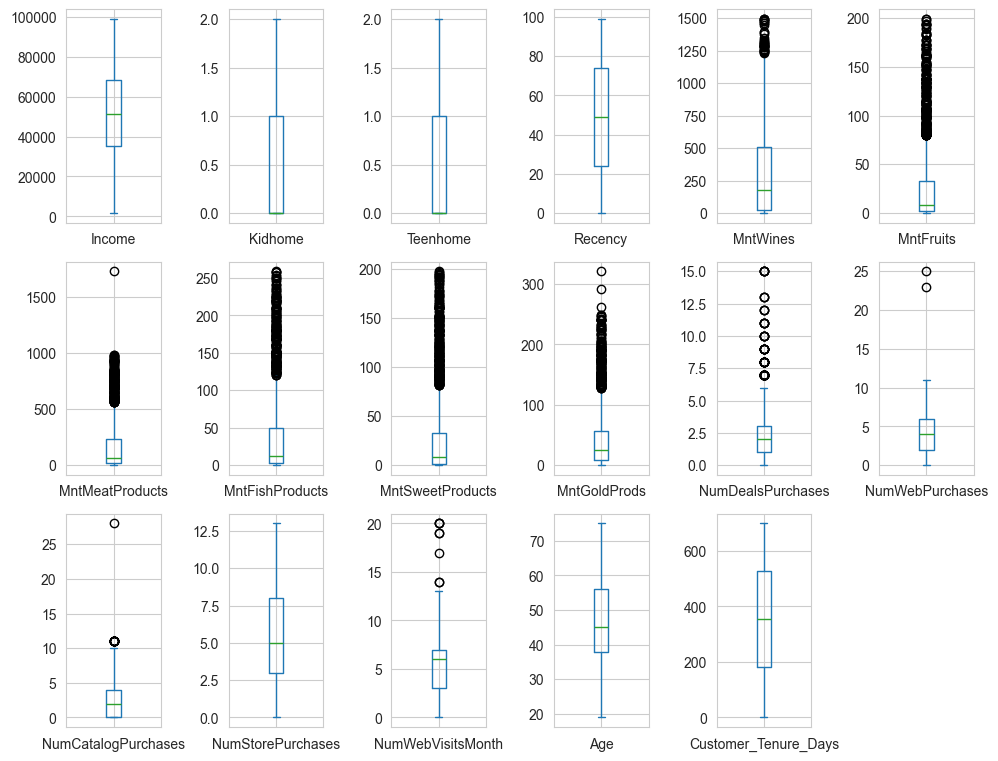

In [437]:
# assuming you’ve defined `not_binary` as the list of non‐binary columns, e.g.:
# not_binary = ['Income','Kidhome','Teenhome','Recency','MntWines', ... ]

# draw boxplots for each non-binary feature
df[not_binary].plot(
    kind='box',
    subplots=True,
    layout=(4, 6),
    figsize=(10, 10)
)
plt.tight_layout()
plt.show()

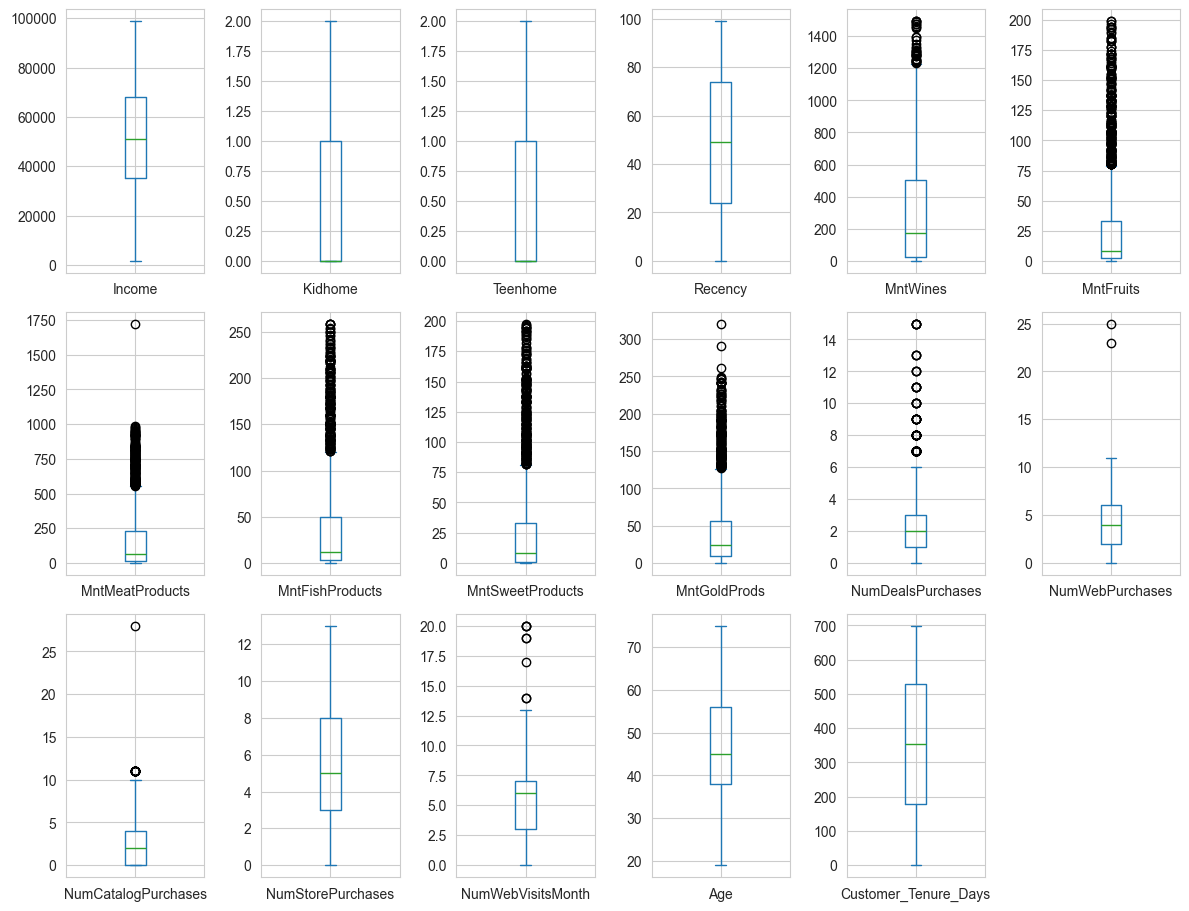

In [440]:
df.plot(
    kind='box',
    subplots=True,
    layout=(4, 6),
    figsize=(12, 12)
)
plt.tight_layout()
plt.show()

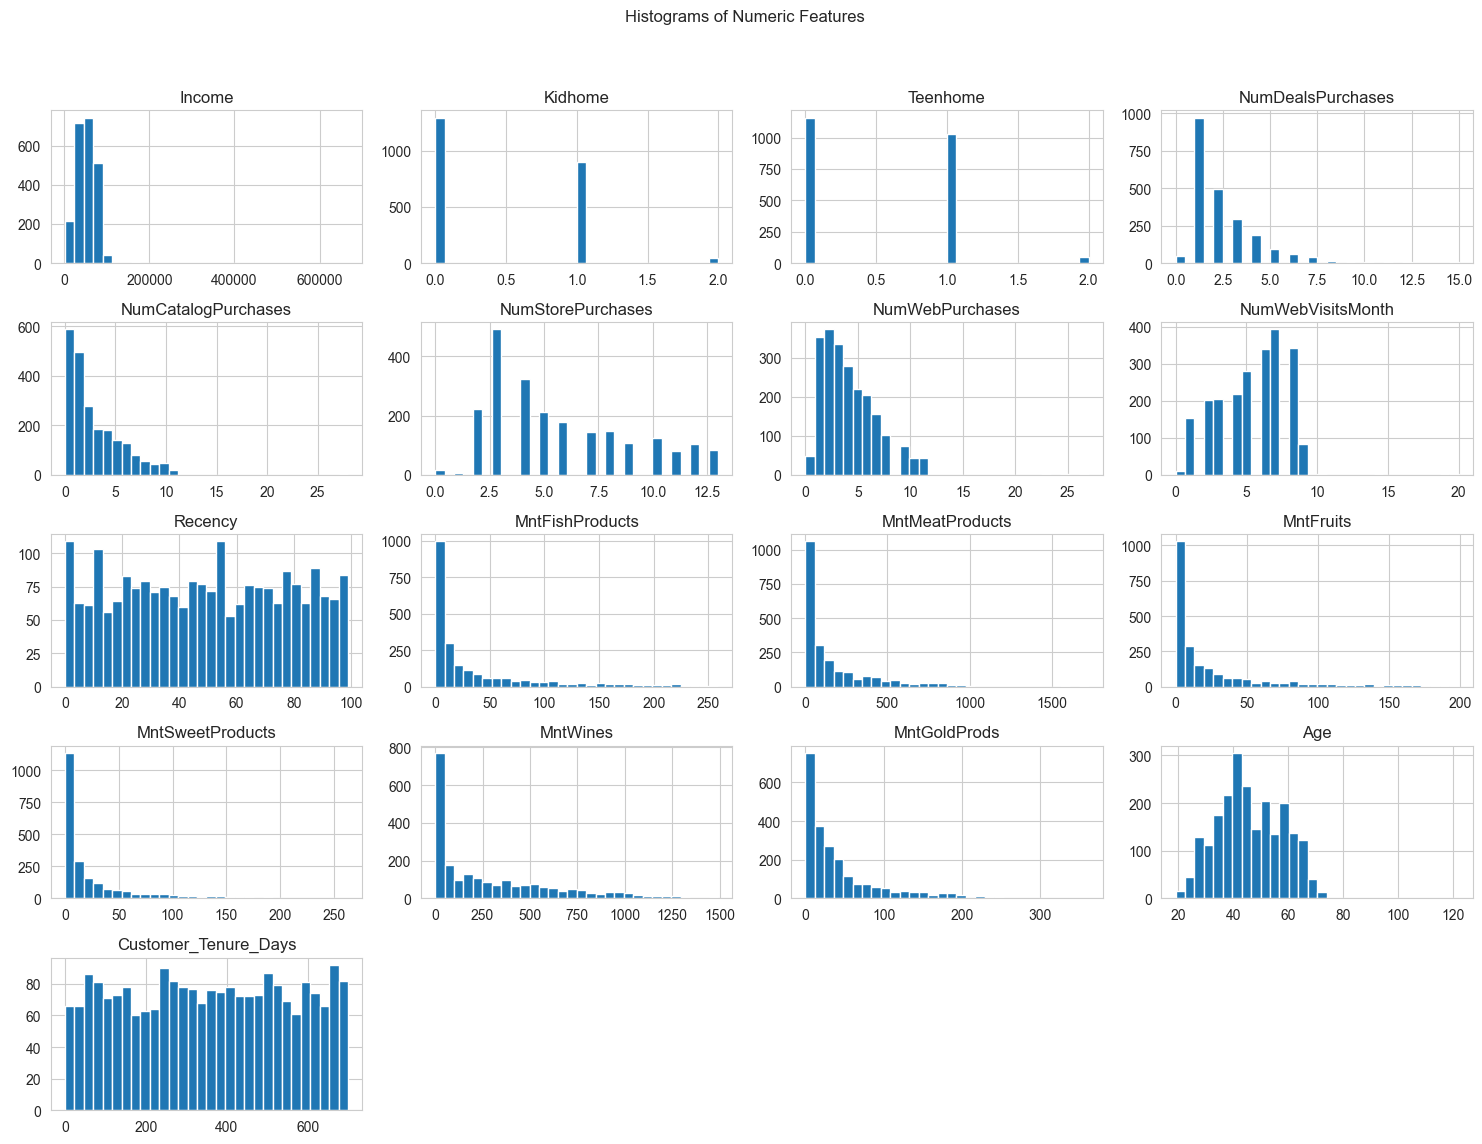

In [312]:
# 3. Distribution of numeric features
# Select numeric columns to visualize
dist_cols = [
    'Income', 'Kidhome', 'Teenhome',
    'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebPurchases', 'NumWebVisitsMonth', 'Recency',
    'MntFishProducts', 'MntMeatProducts', 'MntFruits',
    'MntSweetProducts', 'MntWines', 'MntGoldProds',"Age","Customer_Tenure_Days"
]

# Plot histograms for numeric features
df[dist_cols].hist(bins=30, figsize=(15, 12))
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

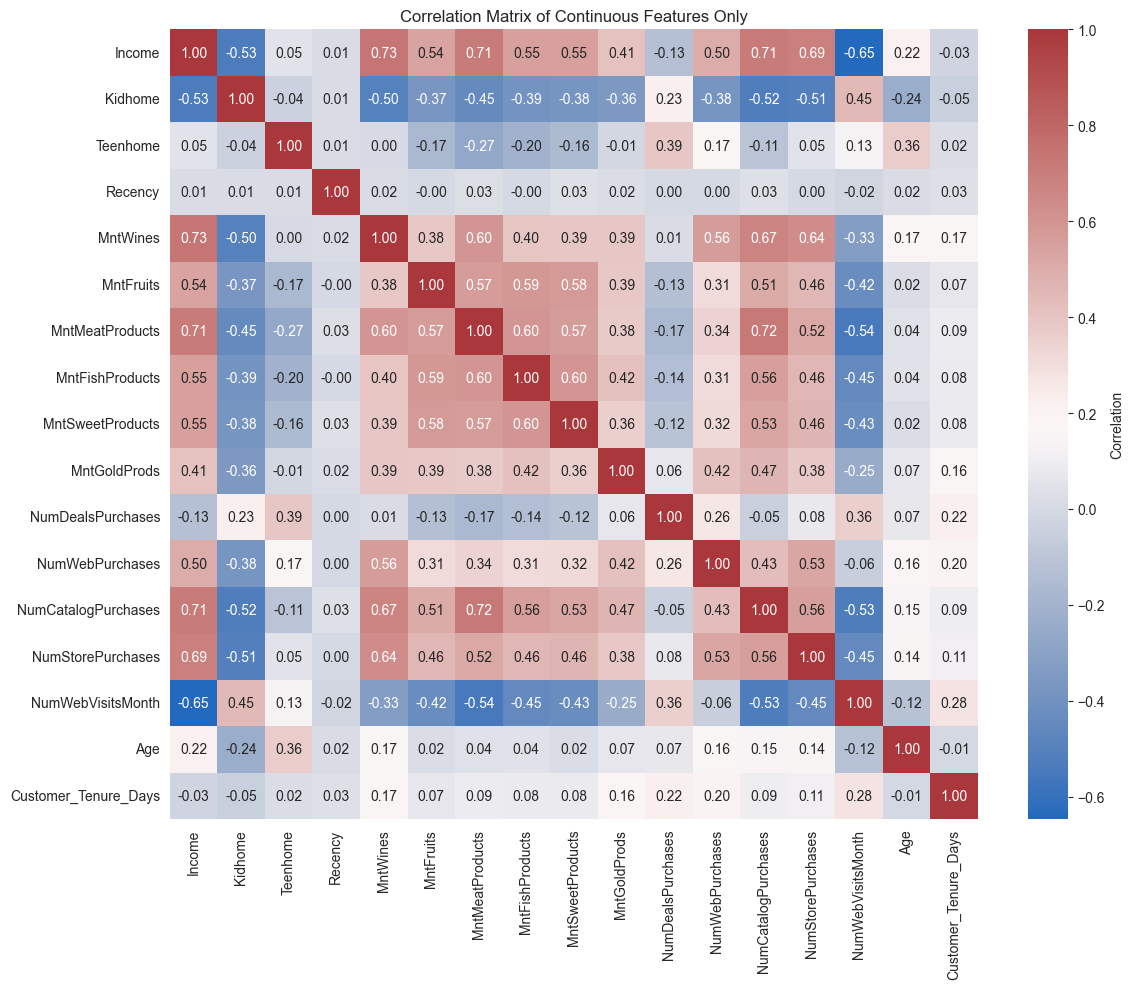

In [447]:
num_not_binary = df[not_binary].select_dtypes(include='number').columns.tolist()

# now compute the corr matrix
corr_matrix = df[num_not_binary].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True, fmt=".2f",
    cmap="vlag",
    cbar_kws={'label': 'Correlation'}
)
plt.title('Correlation Matrix of Continuous Features Only')
plt.tight_layout()
plt.show()

### PCA
- We have too many features for bivariate analysis and pairplot. So we will create 3 components to have insight how our data distrubuted. 

In [ ]:
Dimensionality Reduction (Unsupervised Learning) Before Model Training
Why reduce dimensions?
Adding more features increases computation time and makes data points sparse in the feature space,
which then requires many more observations to “fill” that space.

What does PCA do?
It identifies the directions (principal components) along which the variance in the data is maximized.
Each principal component is a new feature formed as a weighted sum of the original features.
These components are uncorrelated (orthogonal) by construction.
    
How much information do we keep?
You can choose the number of components so that they collectively explain, 
say, 90% (or any percentage) of the original variance—i.e., they capture most of the “redundant” information from correlated features
in fewer dimensions.
eger categoric fetures coksa MSA multiple correspondance analysis, ikisi de coksa FAMD factor analysis
-----------------------------
steps: standardization ... eigen vektor ... 










### pca with sklearn

#### SCALING DATA

In [448]:
df_pca = df[not_binary].select_dtypes(include='number')
df_pca

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      58138        0         0       58       635         88   
1      46344        1         1       38        11          1   
2      71613        0         0       26       426         49   
3      26646        1         0       26        11          4   
4      58293        1         0       94       173         43   
...      ...      ...       ...      ...       ...        ...   
2235   61223        0         1       46       709         43   
2236   64014        2         1       56       406          0   
2237   56981        0         0       91       908         48   
2238   69245        0         1        8       428         30   
2239   52869        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2235              182               42               118           247   
2236               30                0                 0             8   
2237              217               32                12            24   
2238              214               80                30            61   
2239               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  Age  Customer_Tenure_Days  
0                     4                  7   58                   663  
1                     2                  5   61                   113  
2                    10                  4   50                   312  
3                     4                  6   31                   139  
4                     6                  5   34                   161  
...                 ...                ...  ...                   ...  
2235                  4                  5   48                   381  
2236                  5                  7   69                    19  
2237                 13                  6   34                   155  
2238                 10                  3   59                   156  
2239                  4                  7   61                   622  

[2196 rows x 17 columns]

In [449]:
df_pca.shape

(2196, 17)

In [450]:
df_pca.sample().T

1547
Income               30983
Kidhome                  0
Teenhome                 0
Recency                 50
MntWines                51
MntFruits                4
MntMeatProducts         50
MntFishProducts         12
MntSweetProducts         1
MntGoldProds            49
NumDealsPurchases        1
NumWebPurchases          4
NumCatalogPurchases      0
NumStorePurchases        3
NumWebVisitsMonth        8
Age                     52
Customer_Tenure_Days   597

In [455]:
len(df_pca.columns)

17

In [456]:
from sklearn.preprocessing import StandardScaler

# -------------------------------------------------------------------
# Standardize features before applying PCA
# PCA is driven by feature variances. To ensure that each variable contributes equally, we transform all features to have
#   • zero mean
#   • unit variance
# using sklearn’s StandardScaler.
# -------------------------------------------------------------------
# 2) Select only the numeric features you want to include in PCA
#    (e.g., drop identifiers, dates, or the target variable)

# 3) Standardize those features to zero mean, unit variance
scaler = StandardScaler().set_output(transform="pandas")

pca = PCA(n_components=3).set_output(transform="pandas")

# X_pca = pca.fit_transform(X_scaled)

# fit & transform your feature matrix X (e.g. X = df[non_binary_features])
X_scaled_df = scaler.fit_transform(df_pca)



X_scaled_df.sample(10)


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1050    0.94    -0.83     -0.93    -0.28      0.98       2.22   
1841    1.63    -0.83     -0.93     0.83     -0.41       0.55   
311    -1.40     2.90      0.90    -0.73     -0.83      -0.66   
1436    0.44     1.03      0.90     1.48     -0.31      -0.61   
272     0.51    -0.83      0.90    -1.63     -0.41      -0.66   
2226    0.60     1.03      0.90     1.31      0.45      -0.54   
585    -1.20     1.03      0.90    -1.35     -0.81      -0.64   
1573   -1.18     1.03     -0.93    -0.28     -0.88      -0.56   
1507   -0.23    -0.83      0.90     1.35      0.13       1.96   
353     1.00    -0.83     -0.93    -1.07      0.71       1.64   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
1050             0.41             1.73              3.08          0.63   
1841             2.00             0.47              1.11          0.55   
311             -0.72            -0.65             -0.66         -0.81   
1436            -0.56            -0.63             -0.54         -0.17   
272             -0.56            -0.58             -0.61         -0.60   
2226            -0.27            -0.41             -0.24          0.18   
585             -0.70            -0.56             -0.61         -0.68   
1573            -0.65            -0.56             -0.66         -0.64   
1507             0.11             2.92              3.05          0.26   
353              1.12             1.49             -0.66         -0.42   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1050              -0.70             0.71                 1.21   
1841              -0.70            -0.40                 2.64   
311               -0.17            -0.77                -0.94   
1436               0.89             0.34                -0.59   
272               -0.17            -0.03                -0.23   
2226               3.01             2.57                -0.59   
585                0.89            -0.77                -0.59   
1573              -0.70            -1.14                -0.94   
1507               1.95             2.57                 1.93   
353               -0.70            -0.40                 0.49   

      NumStorePurchases  NumWebVisitsMonth   Age  Customer_Tenure_Days  
1050               0.37              -0.97  0.33                 -1.34  
1841              -0.56              -1.39  1.36                  0.19  
311               -0.87               0.69  0.16                 -0.54  
1436              -0.25               0.27  0.67                  1.58  
272               -0.56              -0.14 -0.52                 -1.03  
2226               0.06               1.10 -0.86                  0.54  
585               -0.56              -0.56 -0.18                 -1.39  
1573              -0.87               0.69 -1.46                 -0.54  
1507              -0.25               1.10 -0.52                  1.21  
353                1.29              -1.80 -0.44                  1.27

In [457]:
pca_comps = pca.fit_transform(X_scaled_df)
pca_comps

pca0  pca1  pca2
0     3.95  0.53  2.04
1    -2.33 -0.26 -1.98
2     1.97 -0.30 -0.25
3    -2.62 -1.53  0.43
4    -0.27 -0.35  0.81
...    ...   ...   ...
2235  2.75  1.41  0.65
2236 -1.48  2.70 -1.24
2237  1.30 -0.96 -0.07
2238  2.12  0.55 -1.84
2239 -1.78  1.38 -0.24

[2196 rows x 3 columns]

In [460]:
pca.components_

pca.explained_variance_ratio_.cumsum()

# 3 component %58 

array([0.37849663, 0.50057837, 0.58503798])

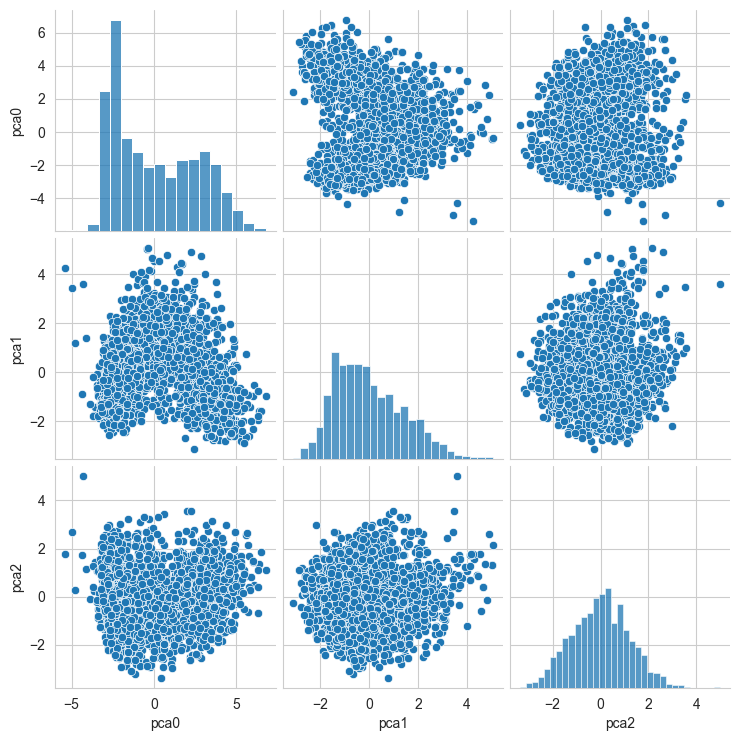

In [462]:
sns.pairplot(pca_comps)

In [464]:

# X_pca: DataFrame with PCA results columns ['PC1', 'PC2', 'PC3']
# Assign each row to the component with the highest value

# 1) Compute label indices (0 for PC1, 1 for PC2, 2 for PC3)
labels = np.argmax(pca_comps[["pca0",	"pca1",	"pca2"]].values, axis=1)

# 2) Map to names if desired
label_names = ["pca0",	"pca1",	"pca2"]
pca_comps['label'] = [ label_names[i] for i in labels ]

# 3) View counts per label
print(pca_comps['label'].value_counts())

label
pca1    798
pca0    760
pca2    638
Name: count, dtype: int64


In [465]:
labels

array([0, 1, 0, ..., 0, 0, 1])

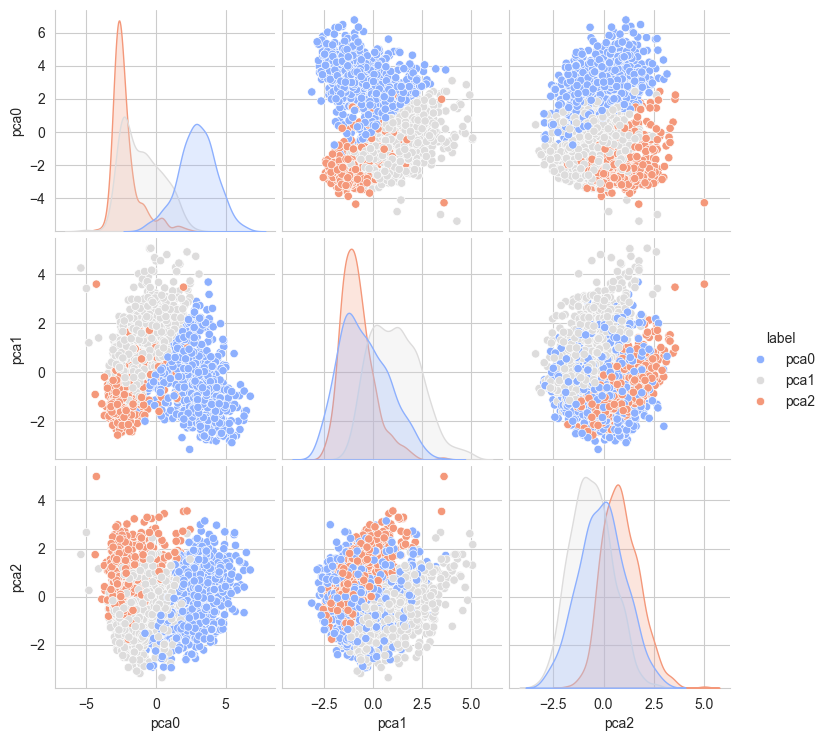

In [467]:
sns.pairplot(pca_comps, hue="label", palette="coolwarm")

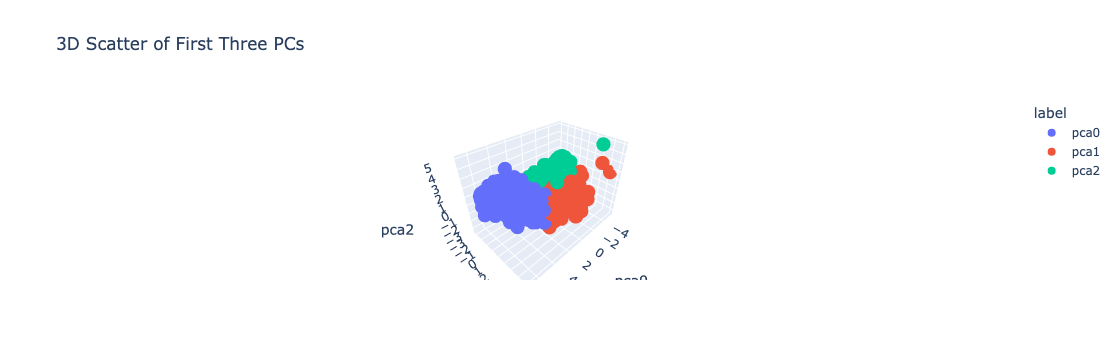

In [472]:
import plotly.express as px

fig = px.scatter_3d(
    pca_comps,
    x="pca0",	y="pca1",	z="pca2",
    color="label",
    title='3D Scatter of First Three PCs'
)
fig.show()

# PCA.  n = 6 

In [473]:
# 4) Apply PCA to reduce to 6 components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled_df)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6'])


# And check explained variance ratios:
print("Explained variance ratios:", pca.explained_variance_ratio_)
print()

X_pca_df.head()

Explained variance ratios: [0.37849663 0.12208174 0.08445961 0.05919218 0.04980627 0.04800242]



PC1   PC2   PC3   PC4   PC5   PC6
0  3.95  0.53  2.04 -0.45 -0.94  1.53
1 -2.33 -0.26 -1.98  0.22  0.42  0.77
2  1.97 -0.30 -0.25  0.99 -0.31 -0.27
3 -2.62 -1.53  0.43  0.89  0.78 -0.61
4 -0.27 -0.35  0.81 -1.35  2.06 -0.81

In [474]:
type(X_pca)

numpy.ndarray

### eigenvalues- eigenvectors

In [475]:
pca.components_

# 6 VEKTOR; 23 FEATUREDAN OLUSUYOR. HER DEGER COEF (HER BI FEATUREA AIT)

array([[ 3.46730522e-01, -2.63898020e-01, -4.05171312e-02,
         7.76304662e-03,  3.01936890e-01,  2.76907221e-01,
         3.22389851e-01,  2.87340718e-01,  2.79193699e-01,
         2.28006722e-01, -5.14008803e-02,  2.25059230e-01,
         3.30454661e-01,  3.00542672e-01, -2.54852999e-01,
         6.98722168e-02,  3.87585549e-02],
       [ 2.82974185e-02, -2.91493830e-02,  4.78070299e-01,
         1.39948752e-02,  1.74782650e-01, -1.23127444e-01,
        -1.32195372e-01, -1.31593625e-01, -1.08453146e-01,
         1.26333230e-01,  5.13221044e-01,  3.75319803e-01,
         7.63702125e-03,  1.55237785e-01,  2.83122427e-01,
         2.71498910e-01,  2.81230575e-01],
       [-1.75121288e-01,  2.14558575e-01, -3.78670719e-01,
         1.50160116e-02, -6.98880891e-04,  1.50905693e-01,
         9.37997942e-02,  1.48930192e-01,  1.48198614e-01,
         1.79025679e-01,  1.91498852e-01,  1.13025838e-01,
         1.09853521e-02, -3.88402021e-02,  3.40803218e-01,
        -5.02244449e-01,  5.0

#### EIGENVALUES ISE HER BI EIGENVEKTORUN TEMSIL ETTIGI VARYANSI GOSTEREN SCALAR BIR DEGER

In [476]:
from sklearn.covariance import empirical_covariance
import numpy as np

# 1) Print the PCA eigenvalues (explained variance)
print("PCA eigenvalues (explained_variance_):")
print(pca.explained_variance_)

# 2) Compute the total variance of the scaled data via its covariance matrix
cov_matrix = empirical_covariance(X_scaled)
total_variance = np.trace(cov_matrix)
print("\nTotal variance (sum of variances):", total_variance)

# 3) Manually compute each component’s share of the total variance
print("\nExplained-variance ratios (manual):")
for idx, eigenval in enumerate(pca.explained_variance_, start=1):
    ratio = eigenval / total_variance
    print(f"  Component {idx}: {ratio:.4f}")


PCA eigenvalues (explained_variance_):
[6.43737417 2.07633512 1.43646746 1.00672543 0.84709236 0.81641283]

Total variance (sum of variances): 22.999999999999996

Explained-variance ratios (manual):
  Component 1: 0.2799
  Component 2: 0.0903
  Component 3: 0.0625
  Component 4: 0.0438
  Component 5: 0.0368
  Component 6: 0.0355


### corr between components

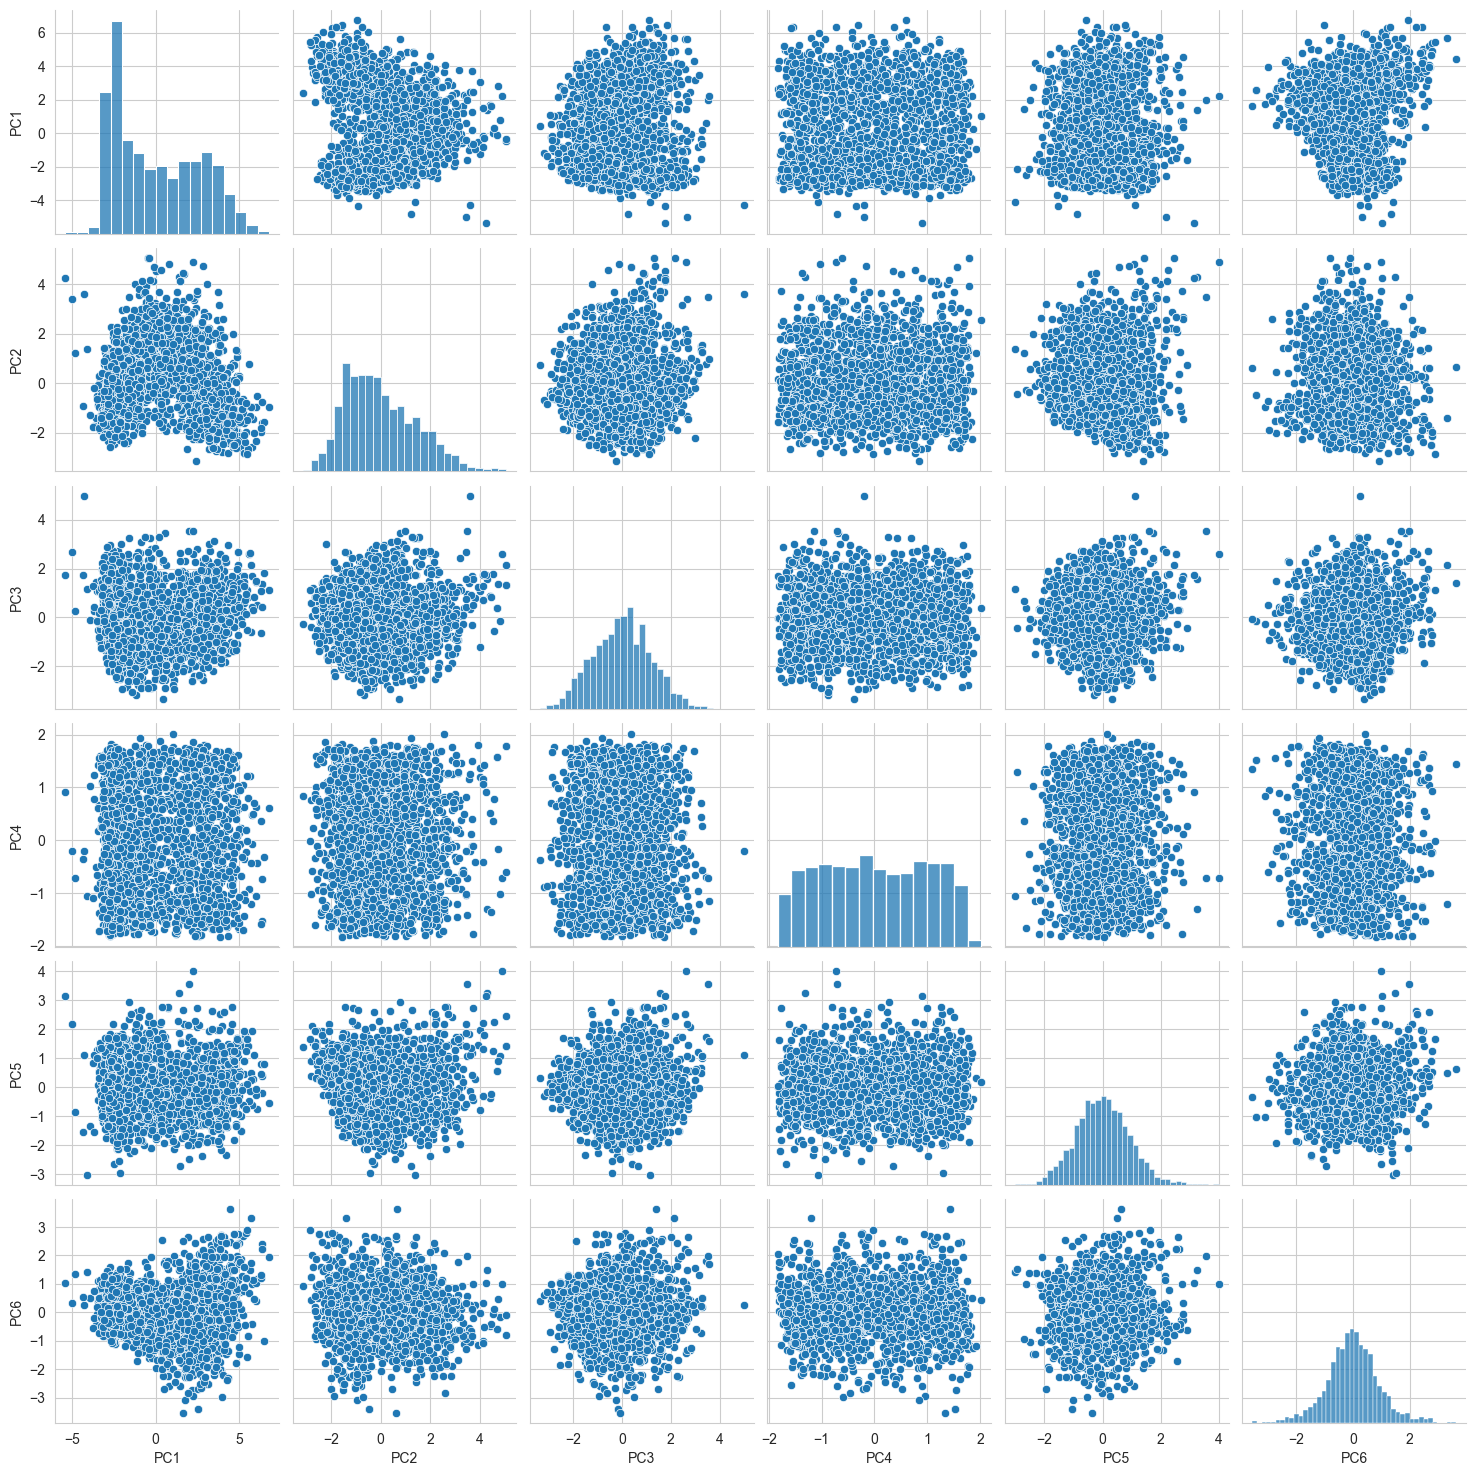

In [477]:
sns.pairplot(X_pca_df)


# korelasyon yok ~

<Axes: >

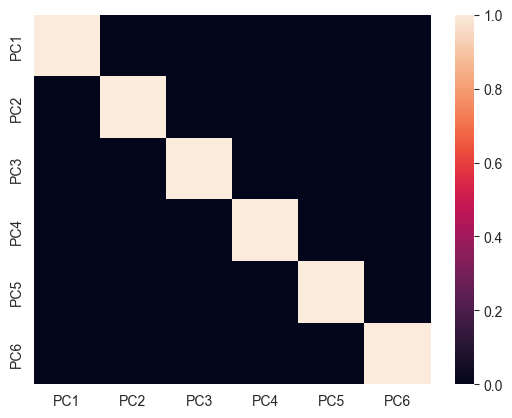

In [478]:
sns.heatmap(X_pca_df.corr())

In [479]:
pca.explained_variance_
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

# 6 component ile yuzde 60 i kapsiyor

array([0.37849663, 0.50057838, 0.58503798, 0.64423016, 0.69403643,
       0.74203885])

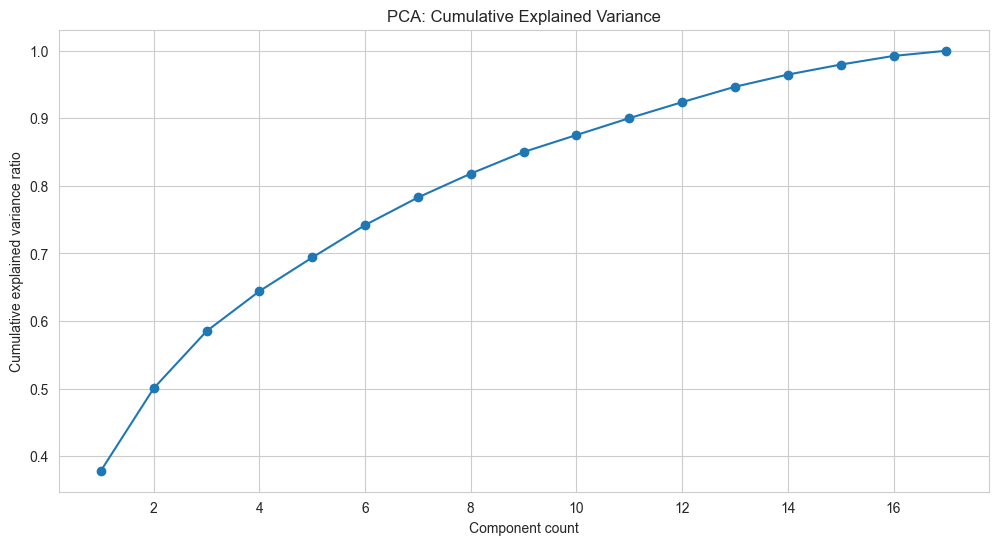

In [480]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1) Fit PCA on your standardized data (use your scaled array or DataFrame here)
#    If you have a DataFrame X_scaled_df:
pca = PCA().fit(X_scaled_df)

# 2) Compute the cumulative explained‐variance ratio
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# 3) Plot cumulative explained variance vs. number of components
plt.figure(figsize=(12, 6))
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker='o'
)
plt.xlabel("Component count")
plt.ylabel("Cumulative explained variance ratio")
plt.title("PCA: Cumulative Explained Variance")
plt.grid(True)
plt.show()

# -------------------------------------------------------------------
# Choose the number of components where the curve crosses your threshold
# (e.g. 75–90% of explained variance) as a best practice for unsupervised tasks.
# -------------------------------------------------------------------


In [481]:
X_scaled_df.shape

(2196, 17)

In [482]:

# Determine how many components to compute (cannot exceed number of features)
n_components = X_scaled_df.shape[1]

# 1) Fit PCA on your scaled data with n_components equal to number of features
pca = PCA(n_components=n_components)
pca.fit(X_scaled_df)

# 2) Gather PCA metrics into a dict
pca_metrics = {
    "explained_variance": pca.explained_variance_,
    "explained_variance_ratio": pca.explained_variance_ratio_,
    "cumulative_explained_variance_ratio": pca.explained_variance_ratio_.cumsum()
}

# 3) Build a DataFrame indexed by component number
df_ev = pd.DataFrame(
    pca_metrics,
    index=range(1, n_components + 1)
)

# 4) Inspect the first few components’ metrics
df_ev


#.    10. componentten itibaren	 data temsil ettigi oran 0.03	 toplamda ise 0.75

explained_variance  explained_variance_ratio  \
1                 6.44                      0.38   
2                 2.08                      0.12   
3                 1.44                      0.08   
4                 1.01                      0.06   
5                 0.85                      0.05   
6                 0.82                      0.05   
7                 0.69                      0.04   
8                 0.60                      0.04   
9                 0.54                      0.03   
10                0.43                      0.03   
11                0.42                      0.02   
12                0.40                      0.02   
13                0.39                      0.02   
14                0.31                      0.02   
15                0.25                      0.01   
16                0.22                      0.01   
17                0.13                      0.01   

    cumulative_explained_variance_ratio  
1                                  0.38  
2                                  0.50  
3                                  0.59  
4                                  0.64  
5                                  0.69  
6                                  0.74  
7                                  0.78  
8                                  0.82  
9                                  0.85  
10                                 0.88  
11                                 0.90  
12                                 0.92  
13                                 0.95  
14                                 0.96  
15                                 0.98  
16                                 0.99  
17                                    1

In [331]:
df_ev.explained_variance.sum()  #feature sayisi (scaler sayesinde unitless,)

23.010272443054948

# 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.

The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of purchases and Income
- **Spender Customers** --  Income is less but purcheses high, so can also be treated as potential target customer.

## K-means Clustering

### Create a new dataset with numeric features

In [483]:
X_scaled_df.sample(5)


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1546   -1.02    -0.83     -0.93    -1.52     -0.88      -0.36   
2146   -1.06     1.03     -0.93    -0.90     -0.83      -0.66   
248     0.78    -0.83     -0.93     1.42      1.65       2.72   
1906    0.44    -0.83      0.90     1.10      0.98       0.52   
542    -0.43     1.03     -0.93    -0.38     -0.16      -0.59   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
1546            -0.70            -0.23             -0.64         -0.46   
2146            -0.72            -0.69             -0.64         -0.77   
248              2.77             2.06              0.27          2.50   
1906             0.33            -0.47             -0.19          0.63   
542             -0.57            -0.62             -0.59          1.13   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1546              -0.70            -0.77                -0.94   
2146              -0.70            -0.77                -0.94   
248               -0.70            -0.03                 2.64   
1906               0.89             0.71                 3.00   
542               -0.17            -0.03                 0.85   

      NumStorePurchases  NumWebVisitsMonth   Age  Customer_Tenure_Days  
1546              -0.87               0.27 -1.55                 -0.26  
2146              -1.18               1.52 -0.18                 -1.27  
248               -0.25              -0.97 -1.63                  1.55  
1906               0.37              -0.14 -0.18                 -0.28  
542               -0.87               0.27 -1.29                  1.11

In [484]:
X_scaled_df.shape


(2196, 17)

In [489]:
df_pca.sample()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
694   47570        1         1        3        67          1               20   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
694                0                 2            31                  3   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
694                2                    2                  2   

     NumWebVisitsMonth  Age  Customer_Tenure_Days  
694                  7   66                   396

In [486]:
# df_pca sadece numeric idi
# 1) Initialize a RobustScaler to reduce the influence of outliers
#    and configure it to return a pandas DataFrame on transform
scaler1 = RobustScaler().set_output(transform="pandas")

# 2) Fit the scaler on df_pca and transform your data in one step,
#    storing the result in cluster_df for downstream clustering


cluster_df = scaler1.fit_transform(df_pca)


In [490]:
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

In [491]:

def hopkins(X, ratio=0.05):
    if not isinstance(X, np.ndarray):
        X = X.values  # convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio)  # 0.05 (5%) based on paper by Lawson and Jures

    # a uniform random sample in the original data space
    X_uniform_random_sample = uniform(
        X.min(axis=0),
        X.max(axis=0),
        (sample_size, X.shape[1])
    )

    # a random sample of size sample_size from the original data X
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    # initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)

    # u_distances = nearest neighbour distances from uniform random sample
    u_distances, _ = nbrs.kneighbors(X_uniform_random_sample, n_neighbors=2)
    u_distances = u_distances[:, 0]  # distance to the first (nearest) neighbour

    # w_distances = nearest neighbour distances from original data sample
    w_distances, _ = nbrs.kneighbors(X_sample, n_neighbors=2)
    w_distances = w_distances[:, 1]  # distance to the second nearest neighbour

    # return the hopkins statistic
    H = u_distances.sum() / (u_distances.sum() + w_distances.sum())
    return H



In [495]:
hopkins(cluster_df, 1)

# random distributed

0.8450842348839497

#### Determine optimal number of clusters

### inertia

In [497]:
def elbow_vis(X, k_range=range(2, 11), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        
        inertia (bool, optional): to select 
       ********* either inertia or distorion.************
        Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42)
            kmeanModel.fit(X)
            distances = kmeanModel.transform(
                X
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

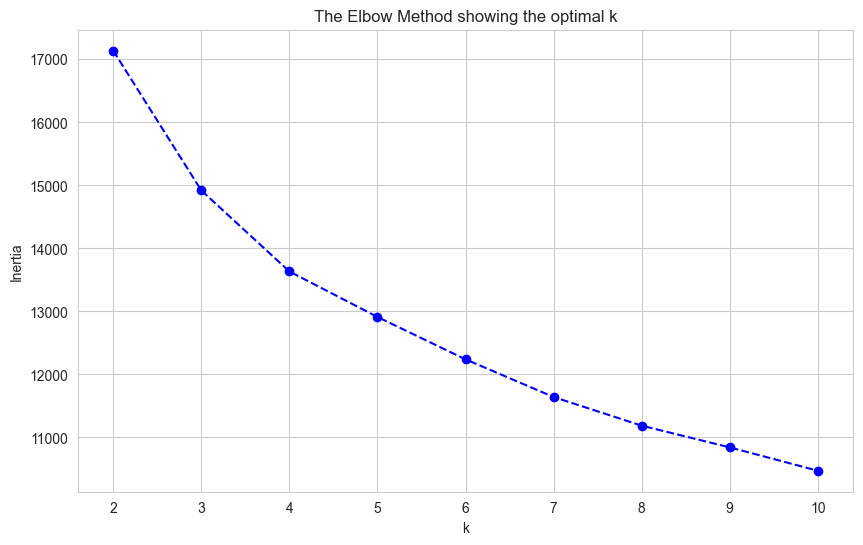

In [498]:
elbow_vis(cluster_df)

### distortion

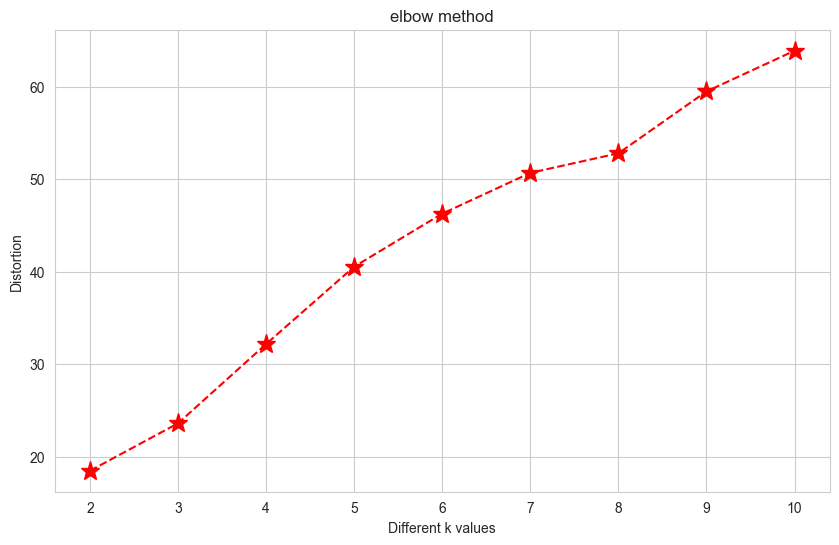

In [500]:
elbow_vis(cluster_df, inertia=False)

### silhoutte score

In [502]:

from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 13)
for num_clusters in range_n_clusters:
    # 1) Fit K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(cluster_df)            # cluster_df is your numeric continious DataFrame
    cluster_labels = kmeans.labels_
    
    # 2) Compute Silhouette Score
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg:.3f}")


# Yakın +1: Küme içi sıkı,

For n_clusters=2, the silhouette score is 0.373
For n_clusters=3, the silhouette score is 0.241
For n_clusters=4, the silhouette score is 0.231
For n_clusters=5, the silhouette score is 0.234
For n_clusters=6, the silhouette score is 0.225
For n_clusters=7, the silhouette score is 0.220
For n_clusters=8, the silhouette score is 0.134
For n_clusters=9, the silhouette score is 0.135
For n_clusters=10, the silhouette score is 0.135
For n_clusters=11, the silhouette score is 0.127
For n_clusters=12, the silhouette score is 0.135


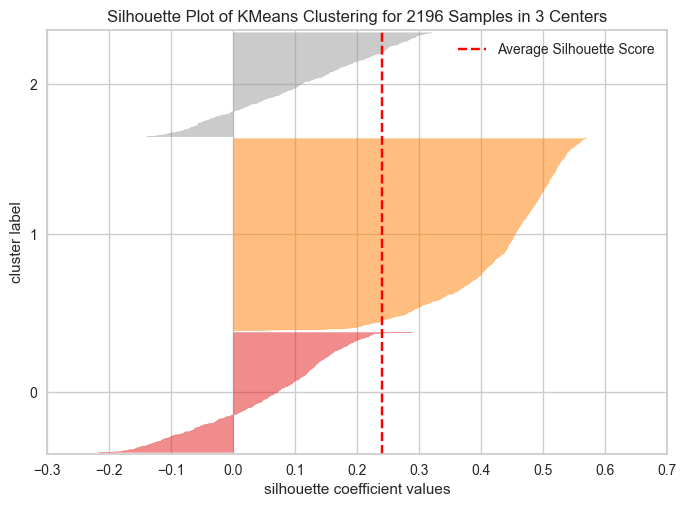

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2196 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [518]:

# 1) Initialize a KMeans model with your chosen number of clusters

model3 = KMeans(n_clusters=3, random_state=42)

# 2) Wrap it in Yellowbrick’s SilhouetteVisualizer
visualizer3 = SilhouetteVisualizer(model3)

# 3) Fit the visualizer on your scaled & cleaned clustering DataFrame
visualizer3.fit(cluster_df)  

# 4) Draw the silhouette plot
visualizer3.poof()  

# paterne uymayan kisim negatif, outlir nedeniyle olabilir

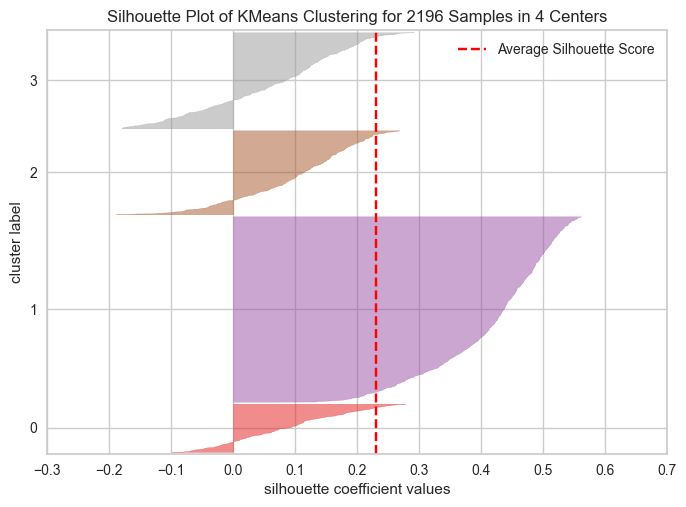

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2196 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [519]:
from yellowbrick.cluster import SilhouetteVisualizer

# 1) Initialize a KMeans model with your chosen number of clusters

model4 = KMeans(n_clusters=4, random_state=42)

# 2) Wrap it in Yellowbrick’s SilhouetteVisualizer
visualizer4 = SilhouetteVisualizer(model4)

# 3) Fit the visualizer on your scaled & cleaned clustering DataFrame
visualizer4.fit(cluster_df)  

# 4) Draw the silhouette plot
visualizer4.poof()  

In [523]:
for viz, name in [(visualizer3, "k=3"), (visualizer4, "k=4")]:
    # number of clusters in the underlying KMeans
    n_clusters = viz.estimator.n_clusters  
    print(f"\nSilhouette scores for {name}:")
    
    # per-cluster means
    for i in range(n_clusters):
        mask = viz.estimator.labels_ == i
        mean_score = viz.silhouette_samples_[mask].mean()
        print(f"  Cluster {i}: {mean_score:.3f}")
    
    # overall mean silhouette
    print(f"  Overall mean silhouette: {viz.silhouette_score_:.3f}")



Silhouette scores for k=3:
  Cluster 0: 0.051
  Cluster 1: 0.432
  Cluster 2: 0.106
  Overall mean silhouette: 0.241

Silhouette scores for k=4:
  Cluster 0: 0.085
  Cluster 1: 0.416
  Cluster 2: 0.099
  Cluster 3: 0.064
  Overall mean silhouette: 0.231


In [ ]:
# Silhouette scores for model4
for i in range(model4.n_clusters):
    mask = model4.labels_ == i
    print(f"mean silhouette score for label {i:<2}: {visualizer4.silhouette_samples_[mask].mean():.3f}")
print(f"mean silhouette score for all labels: {visualizer4.silhouette_score_:.3f}")


#### Apply K Means

In [529]:
# n_clusters = 3. Since we decided to have 3 clusters according to scores and graphs.
kmeans = KMeans(n_clusters=3, random_state=42)

In [530]:
kmeans.fit_predict(cluster_df)

array([2, 1, 0, ..., 0, 0, 1], dtype=int32)

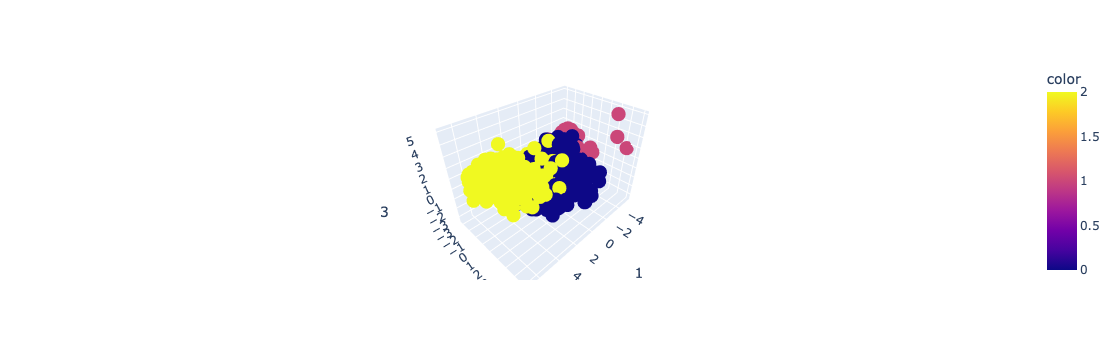

In [531]:
import plotly.express as px

# 3D scatter of PCA components colored by KMeans labels
fig = px.scatter_3d(
    pca_comps,
    x="pca0",
    y="pca1",
    z="pca2",
    color=kmeans.labels_
)

# Customize the axis titles
fig.update_layout(
    scene=dict(
        xaxis_title="1",
        yaxis_title="2",
        zaxis_title="3"
    )
)
fig.show()

#### Visualizing and Labeling All the Clusters

In [540]:

from ipywidgets import interact

# only allow numeric columns for x/y
numeric_cols = df_pca.select_dtypes(include="number").columns.tolist()

@interact(col1=numeric_cols, col2=numeric_cols)
def plot(col1, col2):
    # clear any previous figure
    plt.clf()
    # scatter jointplot colored by cluster.     g assign is optional
    g = sns.jointplot(
        data=df_pca,
        x=col1,
        y=col2,
        hue="kmeans_labels",
        palette="coolwarm",
        height=7,
        kind="scatter",    # ensure scatter on marginals
    )
    plt.show()

interactive(children=(Dropdown(description='col1', options=('Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWi…

In [547]:

numeric_cols = df_pca.select_dtypes(include="number").columns.tolist()

@interact(
    col1=numeric_cols, 
    col2=numeric_cols, 
    col3=numeric_cols
)
def plot_3d(col1, col2, col3):
    """
    Interactive 3D scatter: pick any three columns for axes,
    color‐coded by KMeans cluster labels.
    """
    fig = px.scatter_3d(
        df_pca,
        x=col1,
        y=col2,
        z=col3,
        color=df_pca["kmeans_labels"],
        title=f"3D Scatter: {col1} vs {col2} vs {col3}",
    )
    # Label the axes dynamically
    fig.update_layout(
        scene=dict(
            xaxis_title=col1,
            yaxis_title=col2,
            zaxis_title=col3
        )
    )
    fig.show(renderer="vscode")

interactive(children=(Dropdown(description='col1', options=('Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWi…

### Clustering based on selected features

#### Select features from existing data

In [549]:
df_pca

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      58138        0         0       58       635         88   
1      46344        1         1       38        11          1   
2      71613        0         0       26       426         49   
3      26646        1         0       26        11          4   
4      58293        1         0       94       173         43   
...      ...      ...       ...      ...       ...        ...   
2235   61223        0         1       46       709         43   
2236   64014        2         1       56       406          0   
2237   56981        0         0       91       908         48   
2238   69245        0         1        8       428         30   
2239   52869        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2235              182               42               118           247   
2236               30                0                 0             8   
2237              217               32                12            24   
2238              214               80                30            61   
2239               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  Age  Customer_Tenure_Days  \
0                     4                  7   58                   663   
1                     2                  5   61                   113   
2                    10                  4   50                   312   
3                     4                  6   31                   139   
4                     6                  5   34                   161   
...                 ...                ...  ...                   ...   
2235                  4                  5   48                   381   
2236                  5                  7   69                    19   
2237                 13                  6   34                   155   
2238                 10                  3   59                   156   
2239                  4                  7   61                   622   

      kmeans_labels  
0                 2  
1                 1  
2                 0  
3                 1  
4                 0  
...             ...  
2235              2  
2236              0  
2237              0  
2238              0  
2239              1  

[2196 rows x 18 columns]

In [553]:
clus_pred = df_pca.groupby("kmeans_labels").mean().T
clus_pred

# clusters   wealth ~
#----------|-------------
# 0          orta gelirli
# 1          dusuk gelirli
# 2          yuksek gelirli

kmeans_labels                0         1         2
Income               58,960.50 34,498.27 74,236.53
Kidhome                   0.25      0.78      0.05
Teenhome                  0.80      0.46      0.25
Recency                  48.08     49.09     50.21
MntWines                489.74     43.29    577.71
MntFruits                19.05      4.52     74.70
MntMeatProducts         151.46     22.12    445.71
MntFishProducts          27.68      6.29    106.71
MntSweetProducts         18.40      4.71     77.63
MntGoldProds             58.47     14.01     81.70
NumDealsPurchases         3.54      2.00      1.50
NumWebPurchases           6.06      2.10      5.47
NumCatalogPurchases       3.34      0.52      5.72
NumStorePurchases         7.60      3.24      8.51
NumWebVisitsMonth         5.43      6.46      3.18
Age                      49.80     43.57     46.54
Customer_Tenure_Days    393.05    318.03    372.71

In [554]:
df_pca.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Customer_Tenure_Days', 'kmeans_labels'],
      dtype='object')

In [556]:
# 1) Scale your cluster predictions/importances matrix to [0, 1]
clus_pred_scaled = (
    MinMaxScaler()
    .set_output(transform="pandas")
    .fit_transform(clus_pred.T)
    .T
)

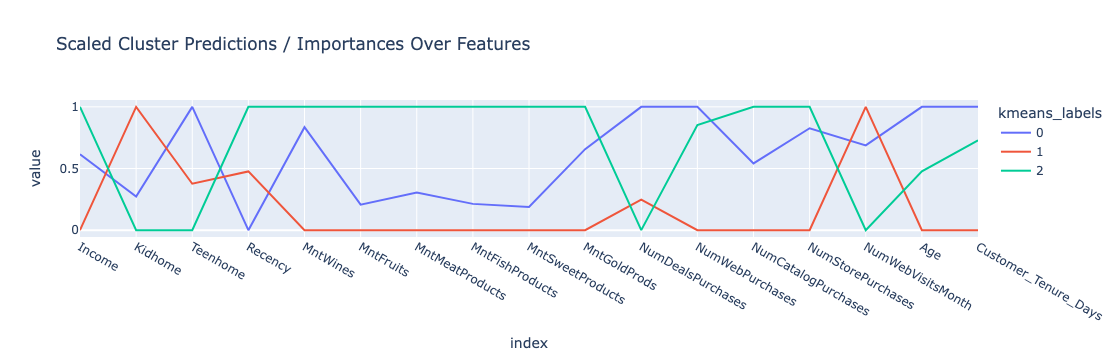

In [557]:

from sklearn.preprocessing import MinMaxScaler
import plotly.express as px



# 2) Plot in Jupyter without any extra init
fig = px.line(
    clus_pred_scaled,
    title="Scaled Cluster Predictions / Importances Over Features"
)
fig.show()


# best seperation & features intricate

In [ ]:
income, wines,  meat, catalogpurchase, age

In [568]:
# Define only the features you want to keep
selected_features = [
    'Income',
    'MntWines', 'MntMeatProducts', 'MntGoldProds',
    'NumCatalogPurchases', 'Age'
    
]

# Subset your DataFrame to just those columns
df_selected = df_pca[selected_features].copy()



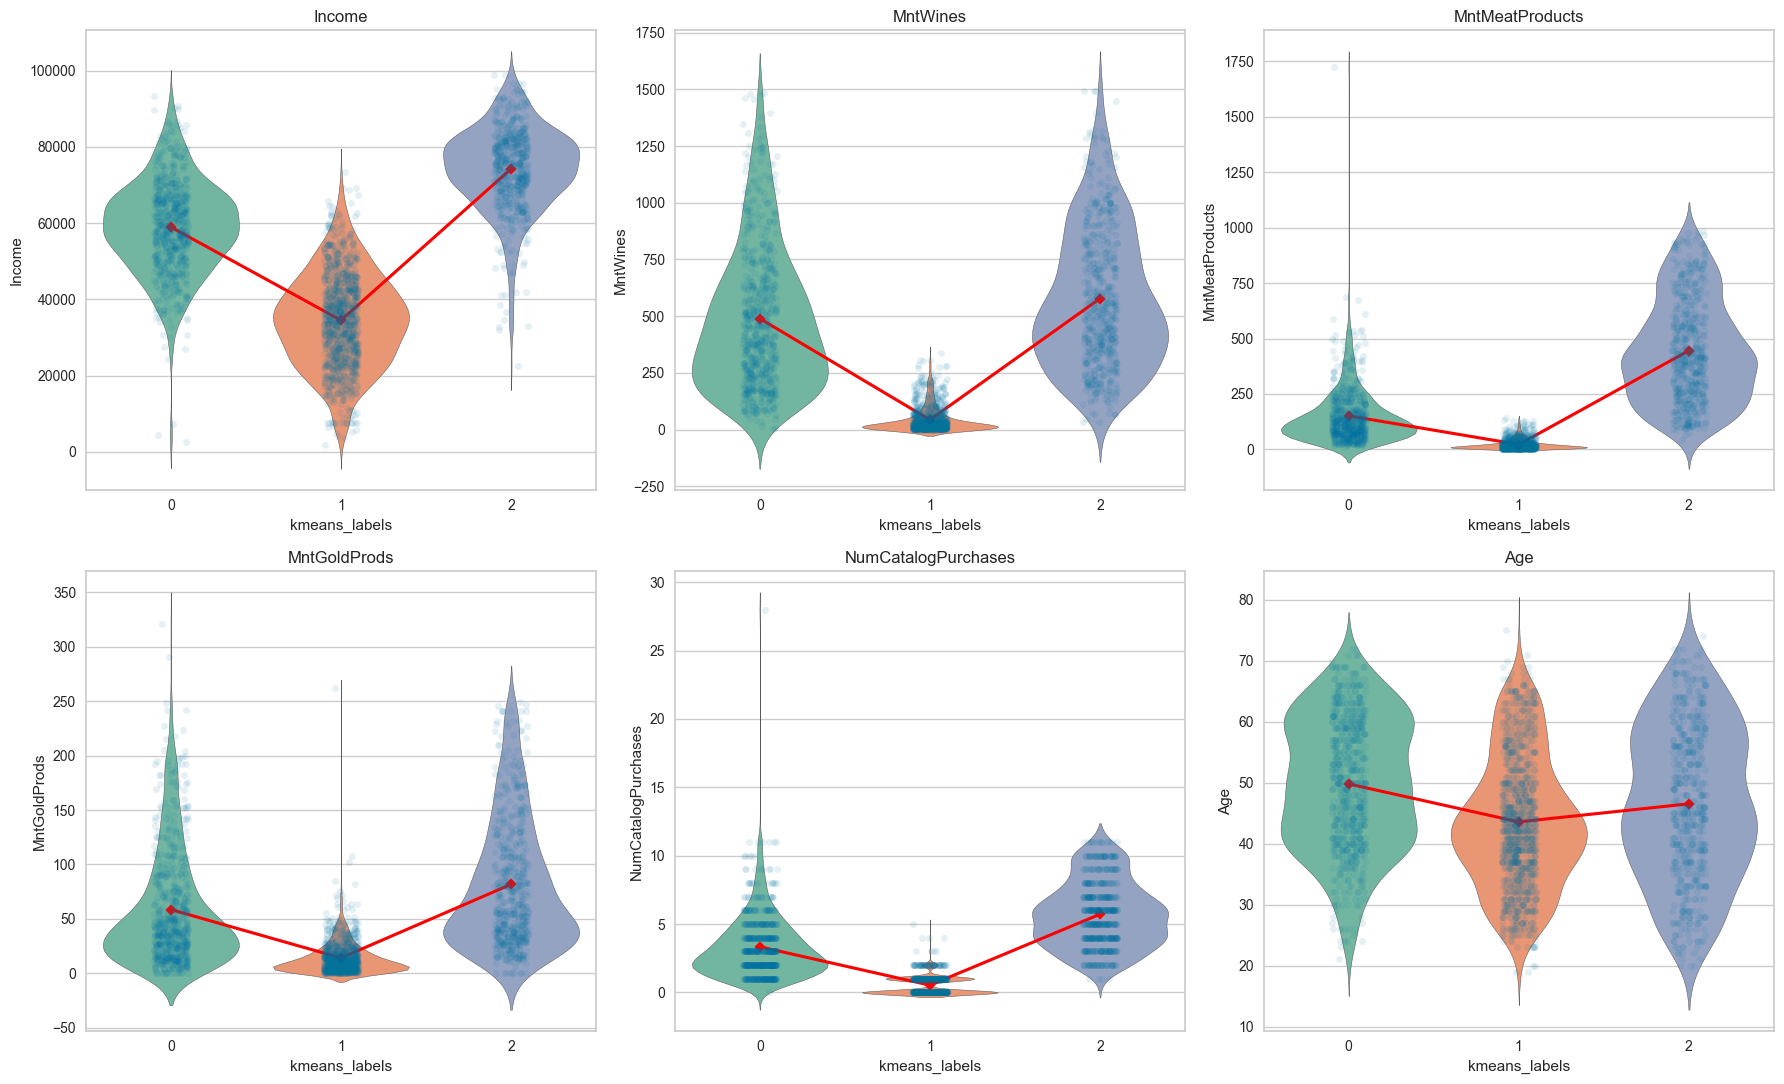

In [575]:

plt.figure(figsize=(18, 11))
n_feats = len(selected_features)
n_cols = 3
n_rows = int(np.ceil(n_feats / n_cols))

for idx, feature in enumerate(selected_features, start=1):
    plt.subplot(n_rows, n_cols, idx)
    # jittered points
    sns.stripplot(
        x="kmeans_labels",
        y=feature,
        data=df_pca,
        jitter=True,
        edgecolor="gray",
        alpha=0.1
    )
    # violin summary
    sns.violinplot(
        x="kmeans_labels",
        y=feature,
        data=df_pca,
        palette="Set2",
        inner=None
    )
    # overlay the mean marker for each cluster
    sns.pointplot(
        x="kmeans_labels",
        y=feature,
        data=df_pca,
        estimator=np.mean,
        color="red",
        markers="D",
        scale=0.7,
        ci=None
    )
    plt.title(feature)

plt.tight_layout()
plt.show()


In [578]:
def income_binner(x):
    if x < 35129:
        return 0
    elif x < 68130:
        return 1
    else:
        return 2

# Apply to your selected DataFrame
df_selected["income_binned"] = df_selected["Income"].apply(income_binner)

In [590]:
df_selected.columns

Index(['Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds',
       'NumCatalogPurchases', 'Age', 'income_binned'],
      dtype='object')

In [591]:
df_selected.drop(columns="income_binned", inplace=True)

In [592]:
df_selected["income"] = df_selected["Income"].apply(income_binner)      #####. ??????????????????? niye yeni bir columna atanmadi??????

In [593]:
# 1) Scale your selected DataFrame (only numeric columns)
scaler1 = RobustScaler().set_output(transform="pandas")
df_selected_scaled = scaler1.fit_transform(df_selected)


In [595]:

# 2) Compute the Hopkins statistic 10 times and take the average
results = []
for _ in range(10):
    # use 5% of the data for the Hopkins test
    results.append(hopkins(df_selected_scaled, 1))
    
avg_hopkins = np.mean(results)
print(f"Average Hopkins statistic over 10 runs: {avg_hopkins:.3f}")

Average Hopkins statistic over 10 runs: 0.914


In [ ]:
# feature azalinca artiyor

#### Determine optimal number of clusters for selected features

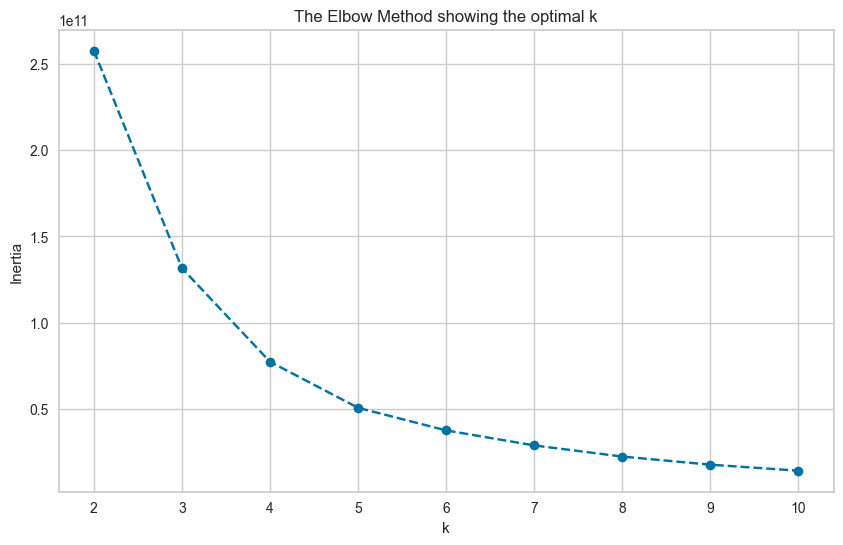

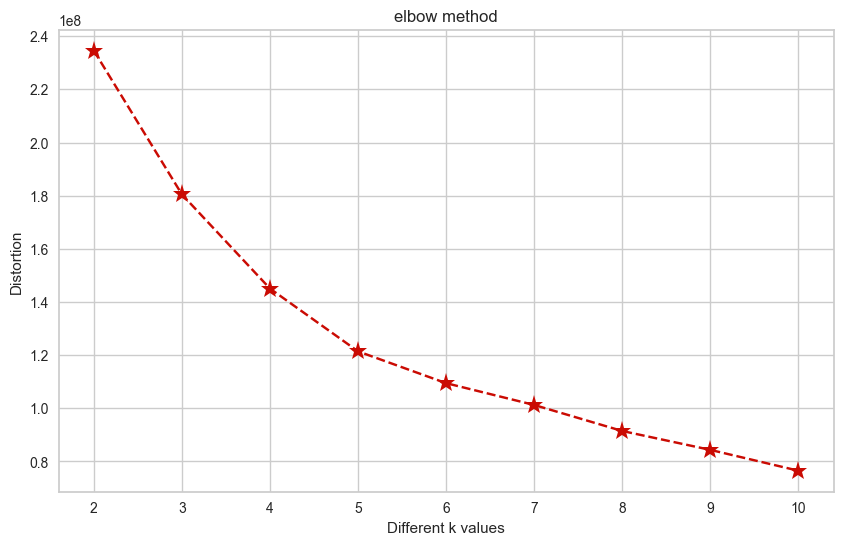

In [596]:
elbow_vis(df_selected)
elbow_vis(df_selected, inertia=False)


In [597]:

# Define the range of cluster counts to evaluate
range_n_clusters = range(2, 9)

# Loop over each k, fit KMeans, compute and print the silhouette score
for num_clusters in range_n_clusters:
    # 1) Initialize and fit KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_selected_scaled)
    
    # 2) Retrieve cluster labels
    cluster_labels = kmeans.labels_
    
    # 3) Compute the average silhouette score
    silhouette_avg = silhouette_score(df_selected_scaled, cluster_labels)
    
    # 4) Report
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg:.3f}")


For n_clusters=2, the silhouette score is 0.432
For n_clusters=3, the silhouette score is 0.392
For n_clusters=4, the silhouette score is 0.415
For n_clusters=5, the silhouette score is 0.408
For n_clusters=6, the silhouette score is 0.372
For n_clusters=7, the silhouette score is 0.380
For n_clusters=8, the silhouette score is 0.342


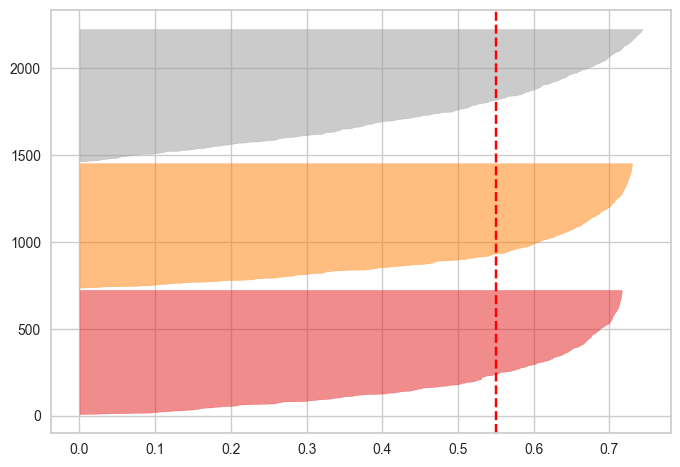

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2196 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [598]:

# 1) Initialize KMeans with 3 clusters
model3 = KMeans(n_clusters=3, random_state=42)

# 2) Wrap it in Yellowbrick’s SilhouetteVisualizer
visualizer3 = SilhouetteVisualizer(model3)

# 3) Fit the visualizer on your selected & scaled DataFrame
visualizer3.fit(df_selected)

# 4) Draw the silhouette plot
visualizer.poof()

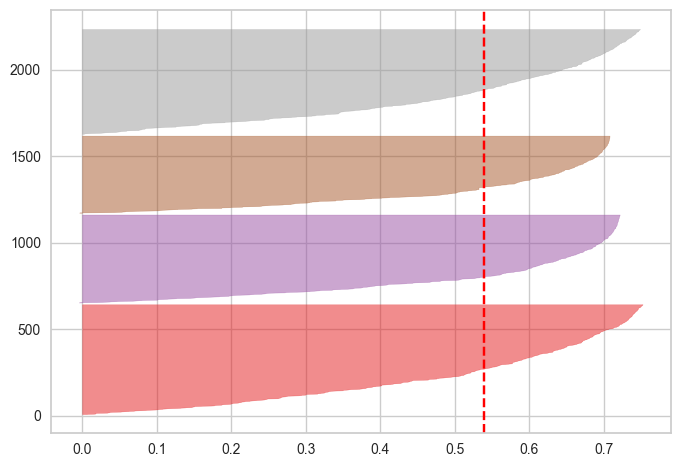

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2196 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [600]:
# 1) Initialize KMeans with 4 clusters
model4 = KMeans(n_clusters=4, random_state=42)

# 2) Wrap it in Yellowbrick’s SilhouetteVisualizer
visualizer4 = SilhouetteVisualizer(model4)

# 3) Fit the visualizer on your selected & scaled DataFrame
visualizer4.fit(df_selected)

# 4) Draw the silhouette plot
visualizer.poof()

In [ ]:
#### 3 ve 4 cluster cikiyor

In [601]:
for i in range(model3.n_clusters):
    label = model3.labels_ == i
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean():.3f}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_:.3f}")



mean silhouette score for label 0    : 0.430
mean silhouette score for label 1    : 0.110
mean silhouette score for label 2    : 0.186
mean silhouette score for all labels : 0.241


In [604]:
for i in range(model4.n_clusters):
    label = model4.labels_ == i
    print(
        f"mean silhouette score for label {i:<5} : {visualizer.silhouette_samples_[label].mean():.3f}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_:.3f}")


mean silhouette score for label 0     : 0.311
mean silhouette score for label 1     : 0.118
mean silhouette score for label 2     : 0.451
mean silhouette score for label 3     : 0.114
mean silhouette score for all labels : 0.241


In [612]:
# 1) Identify all object (categorical) columns in the original df
obj_cols = df.select_dtypes(include="object").columns.tolist()

# 2) Concatenate those onto your df_selected (which holds the numeric & cluster data)
#    Reset indices to ensure alignment if needed
df_final = pd.concat([
    df_selected.reset_index(drop=True),
    df[obj_cols].reset_index(drop=True)
], axis=1)

# 3) Inspect the result
print(df_final.columns)
df_final.head()


Index(['Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds',
       'NumCatalogPurchases', 'Age', 'income', 'Education', 'Marital_Group'],
      dtype='object')


Income  MntWines  MntMeatProducts  MntGoldProds  NumCatalogPurchases  Age  \
0   58138       635              546            88                   10   58   
1   46344        11                6             6                    1   61   
2   71613       426              127            42                    2   50   
3   26646        11               20             5                    0   31   
4   58293       173              118            15                    3   34   

   income   Education Marital_Group  
0       1  Graduation        Single  
1       1  Graduation        Single  
2       2  Graduation     Partnered  
3       0  Graduation     Partnered  
4       1         PhD     Partnered

#### Building the model based on the optimal number of clusters with selected features

In [614]:

# 1) Build the final model based on the optimal number of clusters with selected features
final_model = KMeans(n_clusters=4, random_state=42)
final_model.fit_predict(df_selected)



array([3, 0, 1, ..., 3, 3, 3], dtype=int32)

In [617]:
 # Ensure you have final_model fitted and df1 with your selected features

@interact(
    col1=df_selected.columns, 
    col2=df_selected.columns, 
    col3=df_selected.columns
)
def plot_3d(col1, col2, col3):
    """
    Interactive 3D scatter: pick any three columns for axes,
    color‐coded by the final KMeans cluster labels.
    """
    fig = px.scatter_3d(
        df_selected,
        x=col1,
        y=col2,
        z=col3,
        color=final_model.labels_.astype(str),  # cast to str for categorical legend
        title=f"3D Scatter: {col1} vs {col2} vs {col3}"
    )
    fig.update_layout(
        scene=dict(
            xaxis_title=col1,
            yaxis_title=col2,
            zaxis_title=col3
        )
    )
    fig.show()



interactive(children=(Dropdown(description='col1', options=('Income', 'MntWines', 'MntMeatProducts', 'MntGoldP…

In [620]:
# Interactive boxplot: choose any numeric column and any categorical hue
@interact(
    col=df.select_dtypes(include="number").columns, 
    hue=df.select_dtypes(include="object").columns
)
def plot(col, hue):
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        y=col,
        x=final_model.labels_,   # cluster labels on the x-axis
        hue=hue,
        data=df,
        palette="deep"
    )
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title(f"{col} distribution by cluster and {hue}")
    plt.tight_layout()
    plt.show()





interactive(children=(Dropdown(description='col', options=('Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWin…

In [ ]:
#                 0 orta         1 ultra                      2 fakir                3 zengin  

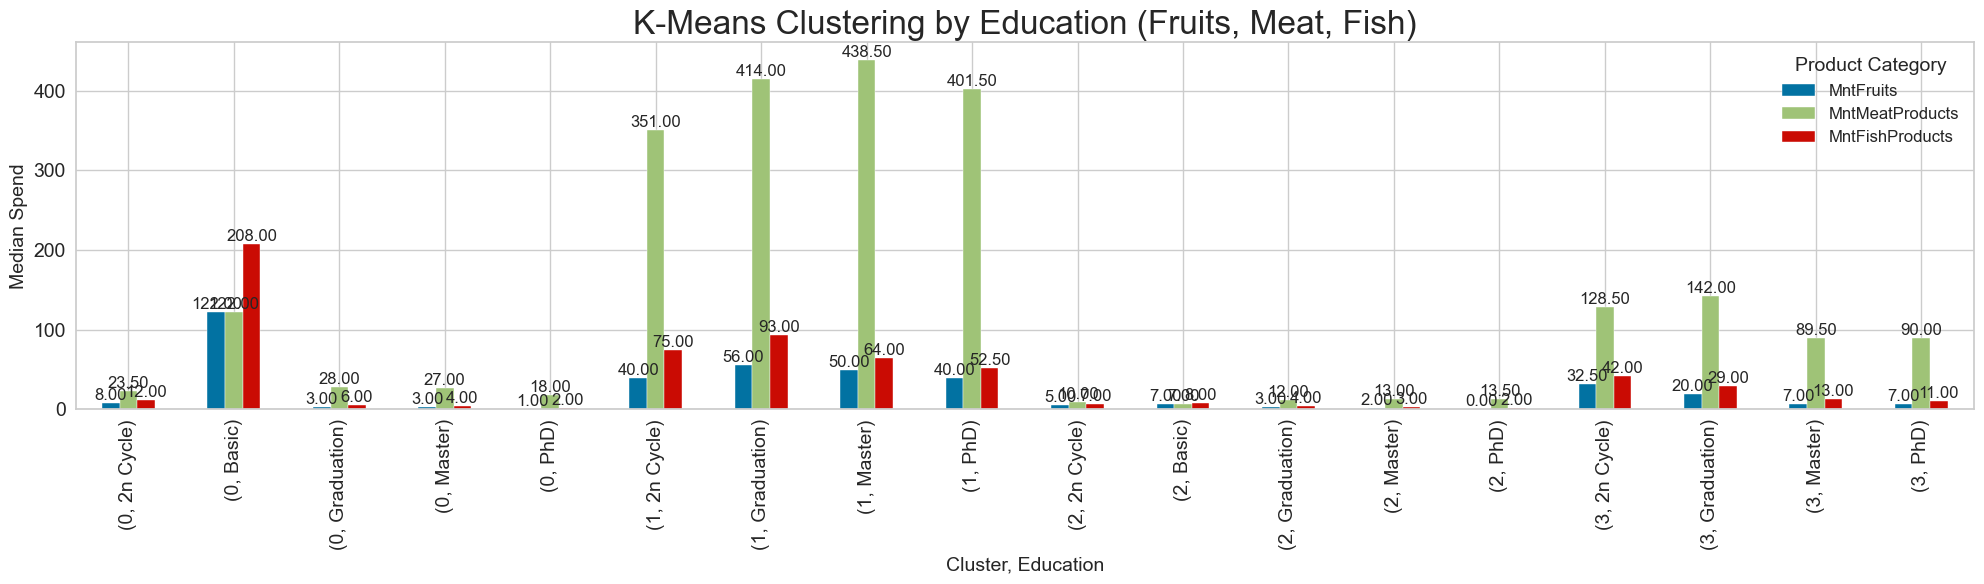

In [623]:
import matplotlib.pyplot as plt

# K-Means Clustering by Education, focusing on Fruits, Meat, and Fish spend

ax = (
    df[["Education"]]
      .join(df[["MntFruits", "MntMeatProducts", "MntFishProducts"]])
      .groupby([final_model.labels_, "Education"])
      .median()
      .plot(kind="bar", figsize=(20, 6), fontsize=14)
)

# Annotate each bar with its height
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", size=12)

plt.title("K-Means Clustering by Education (Fruits, Meat, Fish)", fontsize=24)
plt.xlabel("Cluster, Education", fontsize=14)
plt.ylabel("Median Spend", fontsize=14)
plt.legend(title="Product Category", fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
0. basic edu       1       2         3         

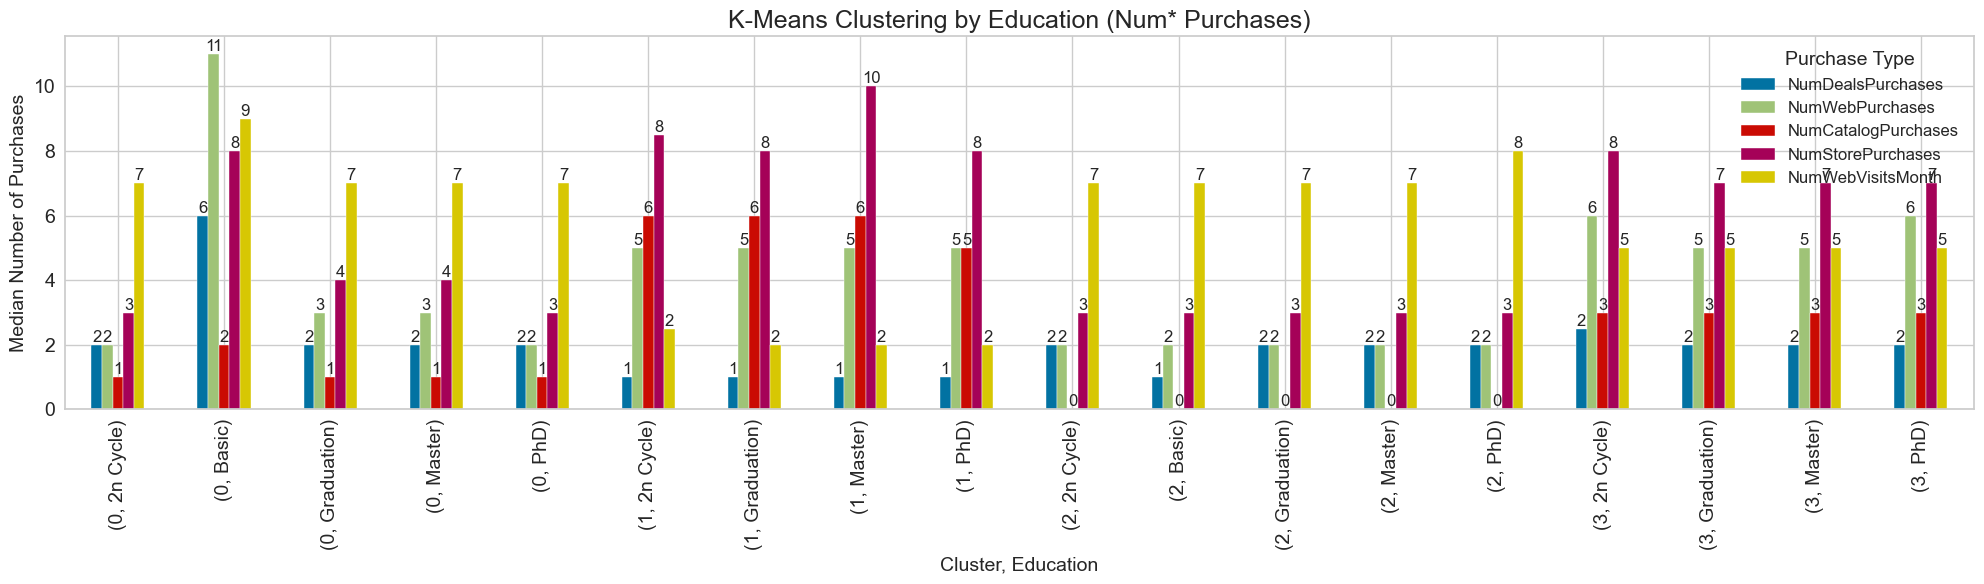

In [624]:

# Define the “num*” features to include
num_features = [col for col in df.columns if col.lower().startswith("num")]

# Build the bar plot by Education and cluster
ax = (
    df[["Education"]]
      .join(df[num_features])                                    # join only the num* columns
      .groupby([final_model.labels_, "Education"])               # group by cluster and education
      .median()                                                  # median of purchase counts
      .plot(kind="bar", figsize=(20, 6), fontsize=14)
)

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", size=12)

plt.title("K-Means Clustering by Education (Num* Purchases)", fontsize=18)
plt.xlabel("Cluster, Education", fontsize=14)
plt.ylabel("Median Number of Purchases", fontsize=14)
plt.legend(title="Purchase Type", fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
#                 0 orta         1 ultra                      2 fakir                3 zengin  

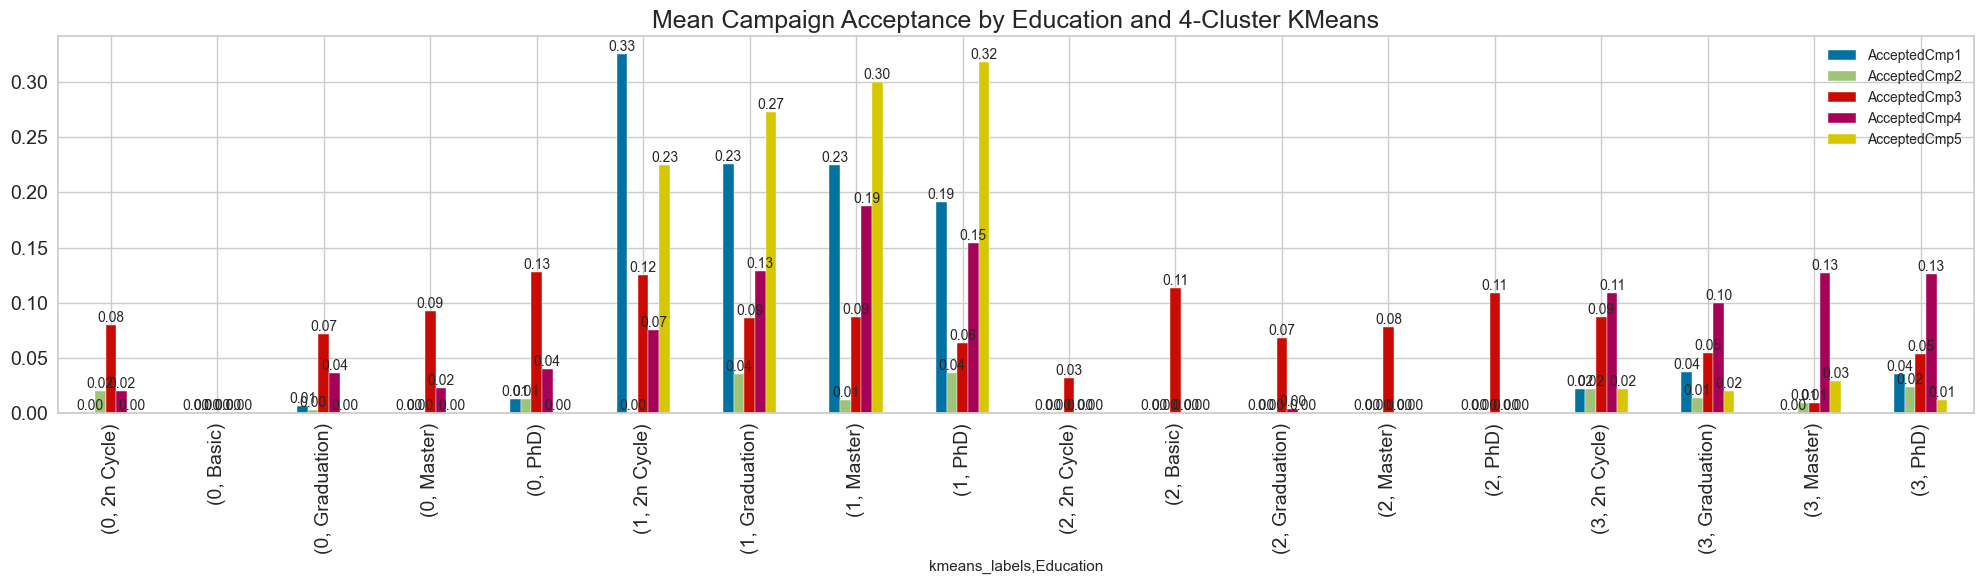

In [640]:


# 1) Align df_1 to your cleaned index
cleaned = df_1.loc[df_selected.index].copy()

# 2) Attach the 4-cluster labels
cleaned["kmeans_labels"] = model4.labels_

# 3) Build the bar chart
ax = (
    cleaned[[
        "Education",
        "AcceptedCmp1","AcceptedCmp2","AcceptedCmp3",
        "AcceptedCmp4","AcceptedCmp5","kmeans_labels"
    ]]
    .groupby(["kmeans_labels","Education"])
    .mean()
    .plot(kind="bar", figsize=(20,6), fontsize=14)
)

# 4) Annotate bars
for c in ax.containers:
    ax.bar_label(c, fmt="%.2f", size=10)

plt.title("Mean Campaign Acceptance by Education and 4-Cluster KMeans", fontsize=18)
plt.tight_layout()
plt.show()


In [ ]:
#                 0 orta                   1 ultra                      2 fakir                         3 zengin  



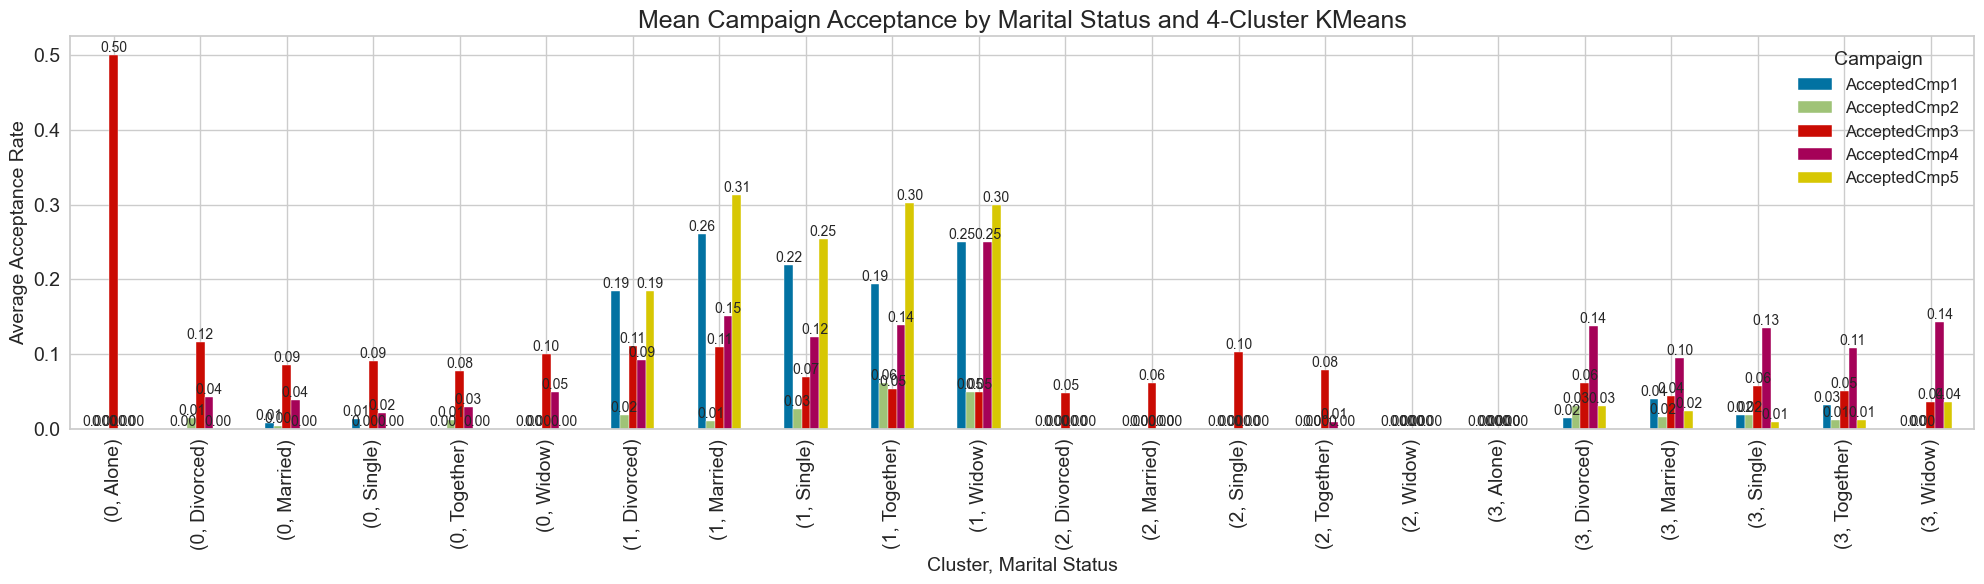

In [650]:


# 0) Ensure cluster labels are in `cleaned`
cleaned['kmeans_labels'] = model4.labels_

# 1) Bar plot of mean campaign acceptance by Marital_Status and cluster
ax = (
    cleaned[[
        'Marital_Status',
        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
        'AcceptedCmp4', 'AcceptedCmp5', 'kmeans_labels'
    ]]
    .groupby(['kmeans_labels', 'Marital_Status'])
    .mean()
    .plot(kind='bar', figsize=(20, 6), fontsize=14)
)

# 2) Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', size=10)

# 3) Labels & layout
plt.title('Mean Campaign Acceptance by Marital Status and 4-Cluster KMeans', fontsize=18)
plt.xlabel('Cluster, Marital Status', fontsize=14)
plt.ylabel('Average Acceptance Rate', fontsize=14)
plt.legend(title='Campaign', fontsize=12, title_fontsize=14, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


In [ ]:
#                 0 orta                     1 ultra                         2 fakir                             3 zengin  


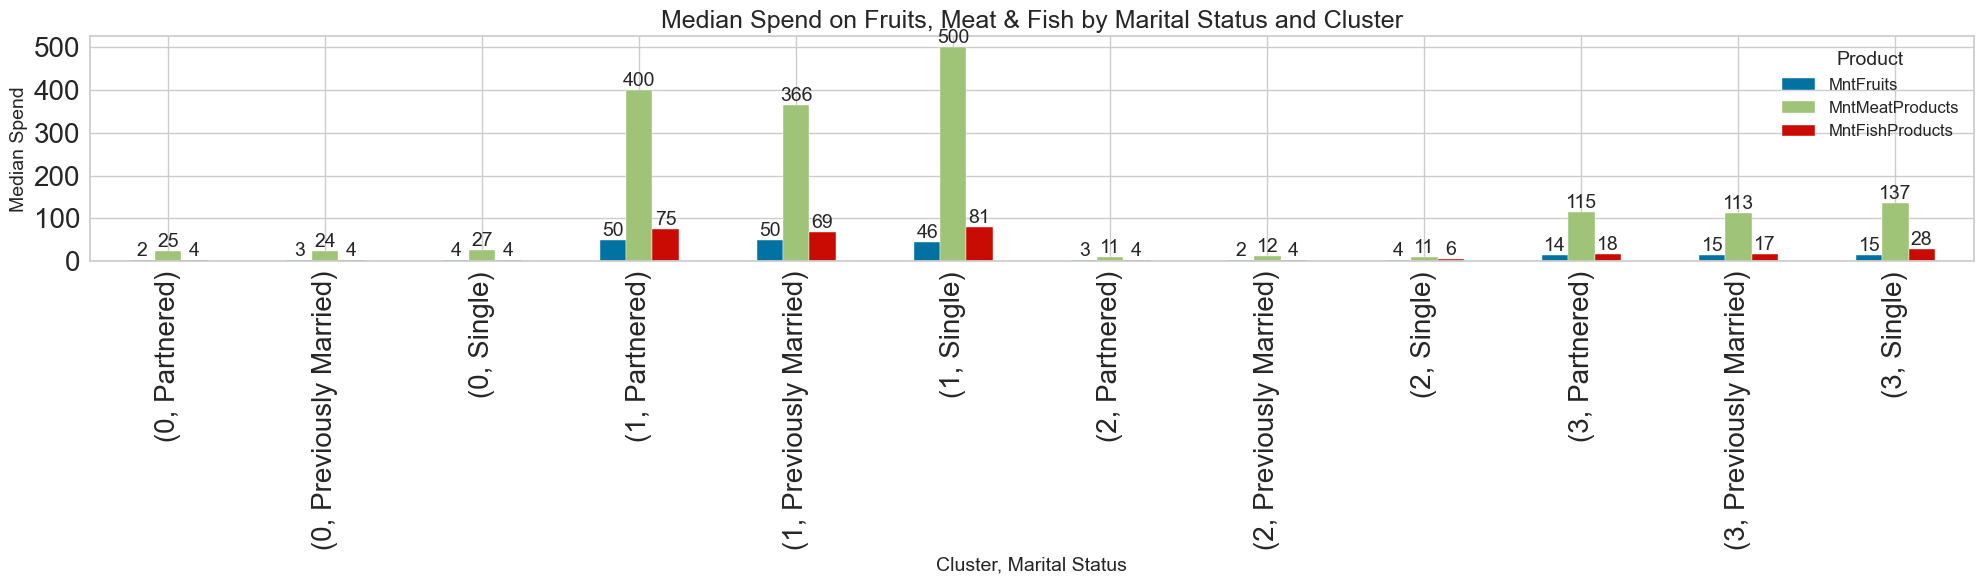

In [656]:

# Bar plot of median Fruits, Meat & Fish spend by Marital_Status and cluster
ax = (
    df[["Marital_Group"]]
      .join(df[["MntFruits", "MntMeatProducts", "MntFishProducts"]])
      .groupby([final_model.labels_, "Marital_Group"])
      .median()
      .plot(kind="bar", figsize=(20, 6), fontsize=20)
)

# Annotate each bar with its height
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

plt.title("Median Spend on Fruits, Meat & Fish by Marital Status and Cluster", fontsize=18)
plt.xlabel("Cluster, Marital Status", fontsize=14)
plt.ylabel("Median Spend", fontsize=14)
plt.legend(title="Product", fontsize=12, title_fontsize=14, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [ ]:
#                 0 orta                     1 ultra                         2 fakir                             3 zengin  


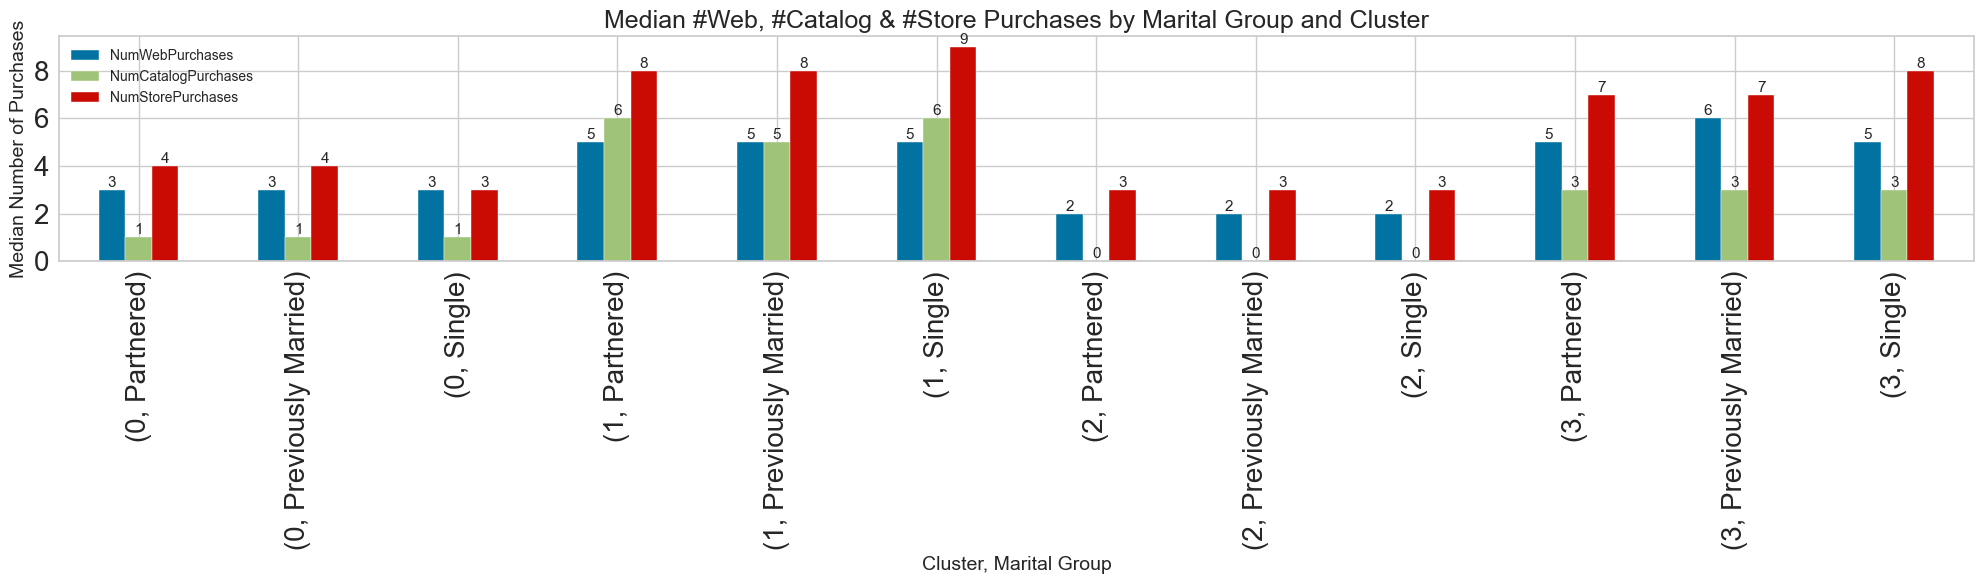

In [664]:


# 0) Make sure your DataFrame has the final 4-cluster labels
df['kmeans_labels'] = final_model.labels_

# 1) Select the cluster & marital group, then join the three Num* purchase columns
ax = (
    df[['kmeans_labels', 'Marital_Group']]
      .join(df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']])
      .groupby(['kmeans_labels', 'Marital_Group'])
      .median()
      .plot(kind='bar', figsize=(20, 6), fontsize=20)
)

# 2) Annotate each bar with its integer value
for p in ax.containers:
    ax.bar_label(p, fmt='%.0f', size=11)

# 3) Final touches
plt.title('Median #Web, #Catalog & #Store Purchases by Marital Group and Cluster', fontsize=18)
plt.xlabel('Cluster, Marital Group', fontsize=14)
plt.ylabel('Median Number of Purchases', fontsize=14)
plt.tight_layout()
plt.show()






In [ ]:
#                 0 orta                     1 ultra                         2 fakir                             3 zengin  


In [643]:
df.head()

Education  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  Graduation   58138        0         0       58       635         88   
1  Graduation   46344        1         1       38        11          1   
2  Graduation   71613        0         0       26       426         49   
3  Graduation   26646        1         0       26        11          4   
4         PhD   58293        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  NumDealsPurchases  \
0              546              172                88  ...                  3   
1                6                2                 1  ...                  2   
2              127              111                21  ...                  1   
3               20               10                 3  ...                  2   
4              118               46                27  ...                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   Age  Customer_Tenure_Days  Marital_Group kmeans_labels  cluster  
0   58                   663         Single             2        3  
1   61                   113         Single             1        0  
2   50                   312      Partnered             0        1  
3   31                   139      Partnered             1        2  
4   34                   161      Partnered             0        3  

[5 rows x 21 columns]

#### We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:


### The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.







----
agglomerative
ward linkage








## Hierarchical Clustering

In [669]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

### Determine optimal number of clusters using Dendogram

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

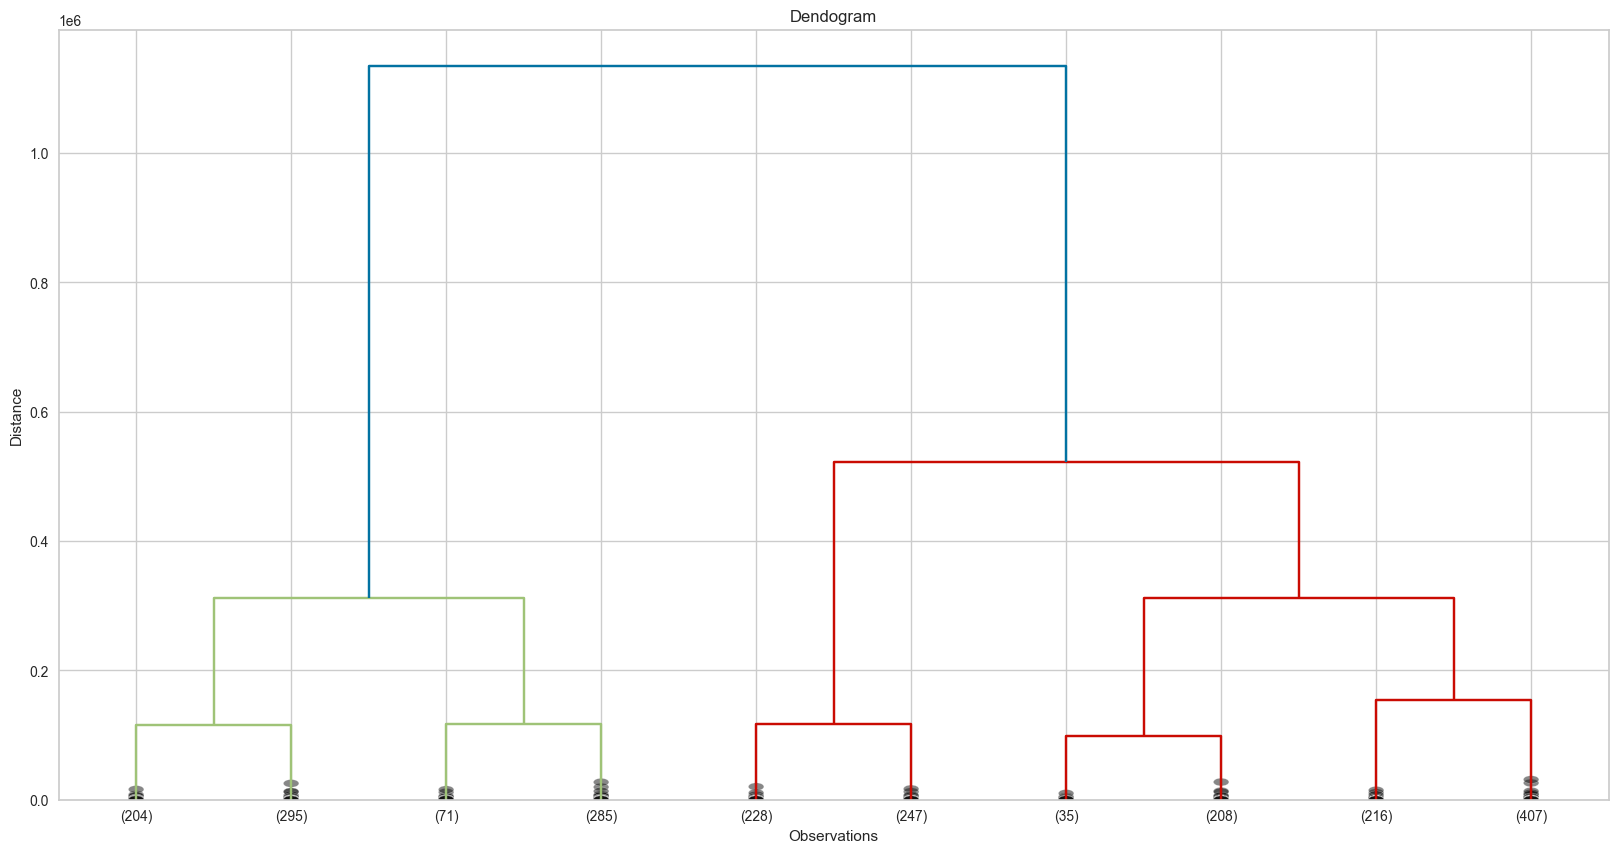

In [670]:
@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=df_selected, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(
        link, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10
    )

In [ ]:
# en iyi 2 ama bize 3 olsa daha iyi 

### silhouette_score

In [671]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(df_selected)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_selected, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5862477393196863
For n_clusters=3, the silhouette score is 0.49314592057154594
For n_clusters=4, the silhouette score is 0.5130549986015761
For n_clusters=5, the silhouette score is 0.5268048466512947
For n_clusters=6, the silhouette score is 0.5090347854158263
For n_clusters=7, the silhouette score is 0.49519342679429246
For n_clusters=8, the silhouette score is 0.4741173061494838
For n_clusters=9, the silhouette score is 0.4900378258742597
For n_clusters=10, the silhouette score is 0.5004970849952985


### Clustering based on selected features

In [683]:
df_selected_scaled.sample(10)

Income  MntWines  MntMeatProducts  MntGoldProds  NumCatalogPurchases  \
759    -0.38     -0.21            -0.28         -0.18                    0   
1503    0.09      0.75             0.11          1.54                    0   
1804   -0.20     -0.33            -0.29         -0.29                -0.25   
1752   -0.59     -0.36            -0.28         -0.29                -0.50   
1839    0.19      1.59             1.52          3.22                 0.75   
1831   -0.19     -0.04            -0.21          0.14                -0.25   
1496   -0.55     -0.29            -0.26         -0.50                -0.50   
580    -0.18      0.06            -0.27         -0.48                -0.25   
1649    0.16     -0.23            -0.17         -0.18                -0.25   
1185   -0.88     -0.36            -0.28         -0.41                -0.50   

       Age  
759   0.61  
1503 -0.17  
1804  1.06  
1752 -0.56  
1839  0.89  
1831  0.61  
1496 -0.39  
580  -0.22  
1649  1.11  
1185 -0.83

In [682]:
df_selected_scaled.drop("income", axis=1, inplace=True)


In [690]:
Agg1 = AgglomerativeClustering(
    n_clusters=4,
    metric="euclidean",  # If linkage = "ward" then metric='euclidean' is required.
    linkage="ward",
)  # originating from the formulation of variance...
y_agg = Agg1.fit_predict(df_selected_scaled)

In [691]:
df["aglo_labels"] = y_agg

In [692]:
df

Education  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     Graduation   58138        0         0       58       635         88   
1     Graduation   46344        1         1       38        11          1   
2     Graduation   71613        0         0       26       426         49   
3     Graduation   26646        1         0       26        11          4   
4            PhD   58293        1         0       94       173         43   
...          ...     ...      ...       ...      ...       ...        ...   
2235  Graduation   61223        0         1       46       709         43   
2236         PhD   64014        2         1       56       406          0   
2237  Graduation   56981        0         0       91       908         48   
2238      Master   69245        0         1        8       428         30   
2239         PhD   52869        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0                 546              172                88  ...   
1                   6                2                 1  ...   
2                 127              111                21  ...   
3                  20               10                 3  ...   
4                 118               46                27  ...   
...               ...              ...               ...  ...   
2235              182               42               118  ...   
2236               30                0                 0  ...   
2237              217               32                12  ...   
2238              214               80                30  ...   
2239               61                2                 1  ...   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  Age  Customer_Tenure_Days       Marital_Group  \
0                     7   58                   663              Single   
1                     5   61                   113              Single   
2                     4   50                   312           Partnered   
3                     6   31                   139           Partnered   
4                     5   34                   161           Partnered   
...                 ...  ...                   ...                 ...   
2235                  5   48                   381           Partnered   
2236                  7   69                    19           Partnered   
2237                  6   34                   155  Previously Married   
2238                  3   59                   156           Partnered   
2239                  7   61                   622           Partnered   

      kmeans_labels cluster  aglo_labels  
0                 3       3            3  
1                 0       0            1  
2                 1       1            0  
3                 2       2            1  
4                 3       3            0  
...             ...     ...          ...  
2235              3       3            2  
2236              3       3            0  
2237              3       3            0  
2238              3       3            0  
2239              3       3            1  

[2196 rows x 22 columns]

In [693]:
pd.crosstab(df["kmeans_labels"],df["aglo_labels"])

aglo_labels      0    1   2    3
kmeans_labels                   
0               90  536   7    2
1              182    3  84  240
2                8  434   3    1
3              354  145  52   55

In [694]:
@interact(col1=df.columns, col2=df.columns)
def plot(col1, col2):
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    sns.scatterplot(
        data=df, x=col1, y=col2, hue=final_model.labels_, palette="coolwarm", ax=ax[0]
    )
    ax[0].set_title("K-means")
    sns.scatterplot(
        data=df, x=col1, y=col2, hue=Agg1.labels_, palette="coolwarm", ax=ax[1]
    )
    ax[1].set_title("Aglomerative")
    plt.show()

interactive(children=(Dropdown(description='col1', options=('Education', 'Income', 'Kidhome', 'Teenhome', 'Rec…

interactive(children=(Dropdown(description='col', options=('Education', 'Income', 'Kidhome', 'Teenhome', 'Rece…

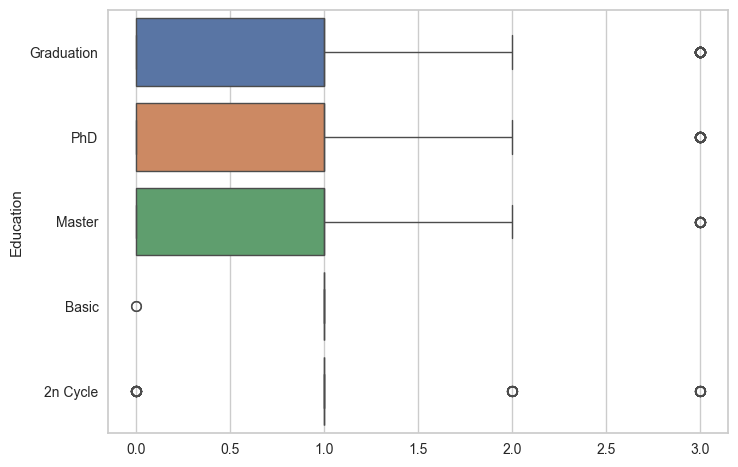

In [695]:
@interact(col=df.columns, hue=df.select_dtypes(include="O").columns)
def plot(col, hue):
    sns.boxplot(y=col, x=Agg1.labels_, hue=hue, data=df, palette="deep")
    plt.legend(bbox_to_anchor=(1, 1))

In [ ]:
### education

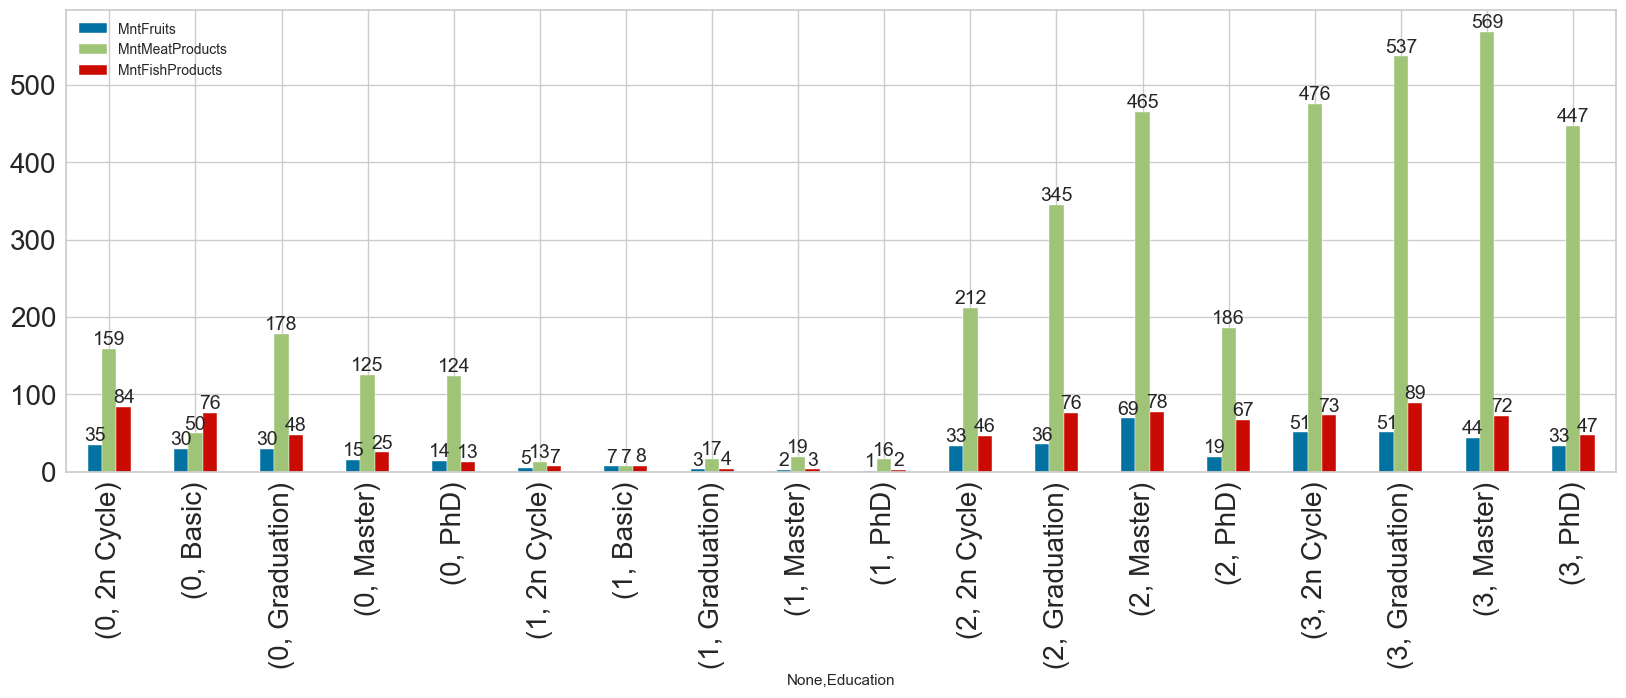

In [702]:
ax = (
    df[["Education"]]
    .join(df[["MntFruits", "MntMeatProducts", "MntFishProducts"]])
    .groupby([Agg1.labels_,"Education"])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

In [ ]:
#                 0 orta                     1 ultra                         2 fakir                             3 zengin  
# eski,

# clusterler yeniden isimlendirilmeli. !!!!!!!
#                 0                      1                          2                              3   


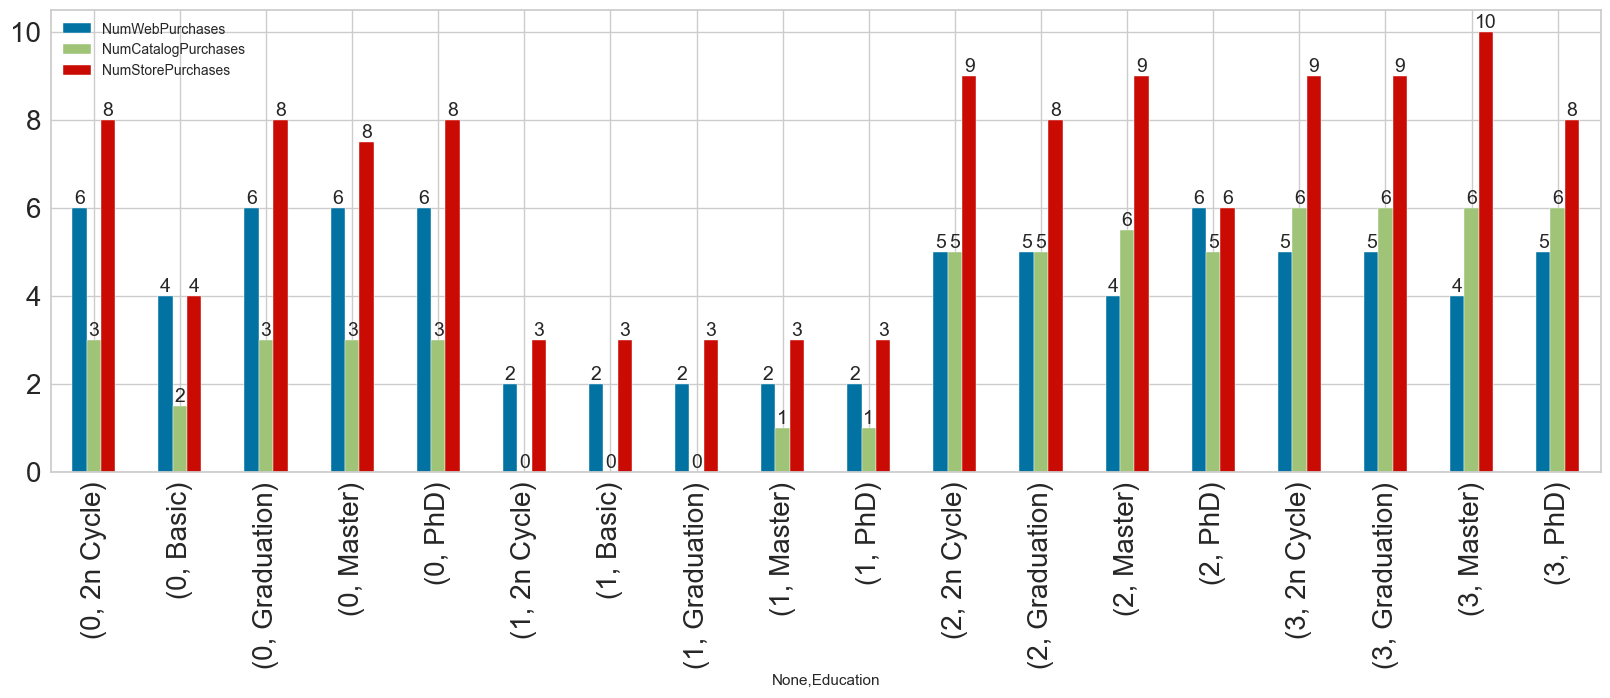

In [704]:
ax = (
    df[["Education"]]
    .join(df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']])
    .groupby([Agg1.labels_,"Education"])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

In [710]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Customer_Tenure_Days', 'Marital_Group', 'kmeans_labels', 'cluster',
       'aglo_labels'],
      dtype='object')

Education  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     Graduation   58138        0         0       58       635         88   
1     Graduation   46344        1         1       38        11          1   
2     Graduation   71613        0         0       26       426         49   
3     Graduation   26646        1         0       26        11          4   
4            PhD   58293        1         0       94       173         43   
...          ...     ...      ...       ...      ...       ...        ...   
2235  Graduation   61223        0         1       46       709         43   
2236         PhD   64014        2         1       56       406          0   
2237  Graduation   56981        0         0       91       908         48   
2238      Master   69245        0         1        8       428         30   
2239         PhD   52869        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0                 546              172                88  ...   
1                   6                2                 1  ...   
2                 127              111                21  ...   
3                  20               10                 3  ...   
4                 118               46                27  ...   
...               ...              ...               ...  ...   
2235              182               42               118  ...   
2236               30                0                 0  ...   
2237              217               32                12  ...   
2238              214               80                30  ...   
2239               61                2                 1  ...   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  Age  Customer_Tenure_Days       Marital_Group  \
0                     7   58                   663              Single   
1                     5   61                   113              Single   
2                     4   50                   312           Partnered   
3                     6   31                   139           Partnered   
4                     5   34                   161           Partnered   
...                 ...  ...                   ...                 ...   
2235                  5   48                   381           Partnered   
2236                  7   69                    19           Partnered   
2237                  6   34                   155  Previously Married   
2238                  3   59                   156           Partnered   
2239                  7   61                   622           Partnered   

      kmeans_labels cluster  aglo_labels  
0                 3       3            3  
1                 0       0            1  
2                 1       1            0  
3                 2       2            1  
4                 3       3            0  
...             ...     ...          ...  
2235              3       3            2  
2236              3       3            0  
2237              3       3            0  
2238              3       3            0  
2239              3       3            1  

[2196 rows x 22 columns]

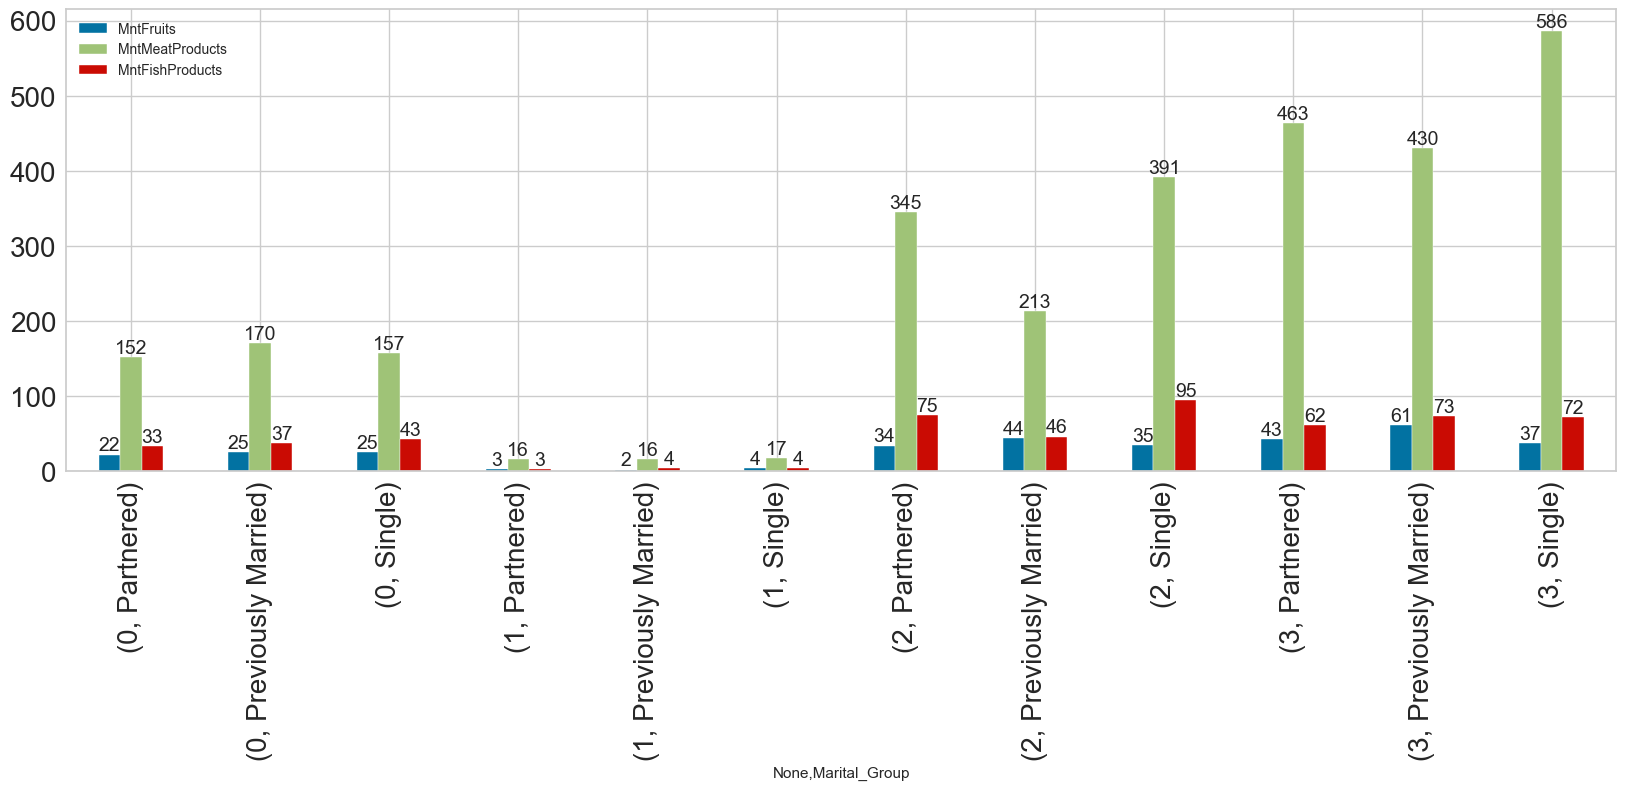

In [715]:
ax = (
    df[["Marital_Group"]]
    .join(df[["MntFruits", "MntMeatProducts", "MntFishProducts"]])
    .groupby([Agg1.labels_,"Marital_Group"])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

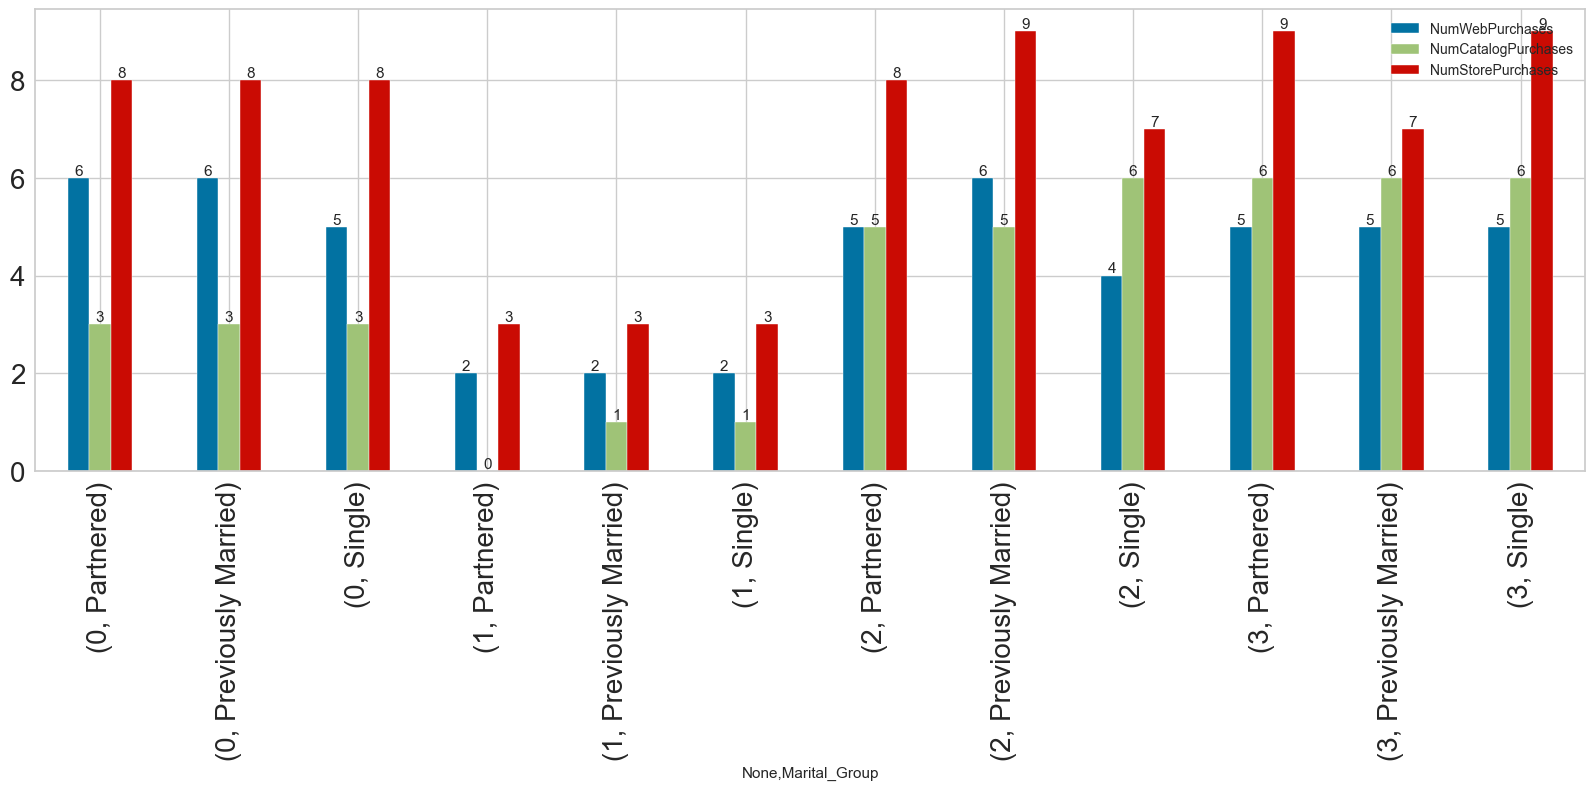

In [717]:
ax = (
    df[["Marital_Group"]]
    .join(df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']])
    .groupby([ Agg1.labels_,"Marital_Group"])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=11)

## Conclusion



*These insights are based on **median** values, which represent the middle value of the data set and are **less influenced by outliers**. As a result, they provide a more accurate depiction of each group's typical purchasing habits.*

***Overall Patterns:***

1. **Web purchases**

   ...
   ...

***Specific Observations:***

1. **Cluster * stands out with the highest median values for all purchase types. This cluster likely represents high-value customers who engage in frequent purchases through various channels, suggesting that these groups are the most active buyers.
2. **Cluster ** has the lowest median values for all purchase types. This cluster may represent less active customers or those with different shopping preferences.
3. Within clusters, the level of education sometimes influences purchase behavior.
4. Clusters 0 and 2 are associated with more web purchases.
5. The third campaign has a clear effect on cluster 0, the first and fifth on cluster 2, and the fourth on cluster 1.
6. Widowed customers have distinct behavior and are separated within the clusters as well.
7. **Cluster ** has high complain rate, if activity and purchases increase like **cluster 2** complain rates drops.

***Additional Insights (Potential):***

1. Consider exploring the reasons for cluster 's high purchase behavior to target marketing or retention strategies.
2. Investigate the factors driving low purchase activity in cluster 0 to potentially re-engage these customers.
3. Further analysis could reveal more nuanced relationships between the level of education and purchase behavior within specific clusters. Understanding the characteristics of each cluster (e.g., demographics, spending habits) could aid in tailoring marketing strategies.

***Labeling for Customer Segments:***

- **Cluster  **: Low-Activity Customers
- **Cluster  **: Moderate-Activity Customers
-  **Cluster **: High-Activity Customers




